# Inferência Estatística - Hábitos Saudáveis e Sintomas de Depressão

### Desafio proposto por Tamy Tsujimoto - Tera
### Resolução por Daniel Jullien
Também disponível em: https://colab.research.google.com/drive/1v96GpAW3jvgKlHvKfOm-zgnTRDq7N3cH?usp=sharing


## Índice
* [Introdução](#introduction)
* [Metodologia](#methodology)
* [Aquisição de Dados](#data)
* [Tratamento de Dados](#datacleaning)
* [EDA: Análise Univariada](#EDAUnivariada)
* [EDA: Análise Bivariada e Testes de hipóteses](#EDABivariada)
* [Conclusão](#conclusao)
* [Referências](#referencias)

## 1. Introdução <a name="introduction"></a>

O transtorno depressivo representa um grande problema de saúde pública e é apontado como uma das principais causas de doenças e debilitações segundo a Organização Mundial da Saúde (OMS). A depressão resulta de uma interação complexa de fatores sociais, psicológicos e biológicos e, embora o acesso a diagnósticos e tratamentos esteja aumentando, muitos ainda não possuem acesso ao controle adequado dos sintomas depressivos.

Para garantir um estilo de vida saudável, a OMS recomenda a prática regular de exercícios, bem como a adoção de uma dieta saudável rica em alimentos in natura e com reduzido teor de gordura saturada, sal e açucares refinados.

Neste projeto, iremos:
1. Avaliar qual o perfil de indivíduos adultos com sintomas depressivos nos EUA
2. Investigar se hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população.

Utilizaremos dados do National Health and Nutrition Examination Survey (NHANES) [[1](#1)] de 2006, uma pesquisa conduzida pelo National Center for Health Statistics (NCHS) do Centro de Controle e Prevenção de Doenças (Centers for Disease Control - CDC) para avaliar a saúde e nutrição de adultos e crianças dos Estados Unidos. Dados coletados incluem questões demográficas, socioeconômicas, dietéticas e relacionadas à saúde, com o componente de exame contendo medidas médicas, odontológicas, fisiológicas e exames laboratoriais. Destes dados, utilizaremos as bases de dados demográficas e de PHQ-9, HEI e PAG.

#### Patient Health Questionnaire-9 (PHQ-9)

O Patient Health Questionnaire-9 (PHQ-9) é um instrumento utilizado para avaliar o grau de depressão em pacientes, que consiste em um questionário de 9 itens em que os respondentes indicam a frequência de sintomas de depressão nas duas últimas semanas, através dos dizeres "Nas últimas 2 semanas, com que frequência você ficou incomodado por algum dos problemas a seguir? (0 = nenhuma vez, 1 = menos de uma semana, 2 = uma semana ou mais e 3 = quase todos os dias)".

O escore total é calculado à partir da soma dos itens 1-9 e varia de 0 a 27, em que maiores valores do escore indicam maiores frequências de sintomas de depressão. Aqueles com pontuação maior ou igual a 5 para o escore total de PHQ-9 são considerados como tendo sintomas leves (5-9), moderados (10-14), moderadamente severos (15-19) e severos de depressão (>= 20). 

#### Healthy Eating Index (HEI)

O Healthy Eating Index (HEI) é um índice de qualidade da dieta composto por 13 componentes baseado nas orientações dietéticas do governo federal americano (Dietary Guidelines for Americans). O HEI utiliza diferentes grupos alimentares para o cálculo do escore, variando de 0 a 100, em que maiores valores do escore refletem dietas mais próximas das orientações alimentares em vigor.

#### Physical Activity Guidelines (PAG)

O Physical Activity Guidelines for Americans (PAG) é emitido pelo Departamento de Saúde e Serviços Humanos (U.S. Department of Health and Human Services (HHS)) e possui recomendações de atividades físicas. Este documento é utilizado em conjunto com as orientações dietéticas para americanos (Dietary Guidelines for Americans) para promover a importância de ser fisicamente ativo e seguir uma dieta saudável.

O PAG recomenda que adultos se engajem em pelo menos 150 minutos de atividades aeróbicas de intensidade moderada ou 75 minutos de atividades aeróbicas de intensidade vigorosa semanalmente. A partir dos dados coletados do NHANES, é calculado o número de minutos de atividades físicas, definido como a total minutos semanais de atividades físicas moderadas + 2*(total minutos de atividades aeróbicas vigorosas).

#### Dicionário de dados

Um dicionário completo das variáveis utilizadas pode ser encontrado na referência [[2](#2)].

## 2. Metodologia<a name="methodology"></a>

O projeto será dividido em três etapas principais:

1. Leitura e pré-processamento dos dados.<br>
    As bases de dados são compostos por dois arquivos:
    - Dados de PHQ-9 e demográficos de adultos pesquisados no NHANES 2005-2006
    - Dados de HEI de PAG de crianças e adultos pesquisados no NHANES 2005-2006

2. Análise exploratória univariada para compreender a distribuição dos dados na amostra da pesquisa


3. Análise exploratória bivariada aliada a testes de hipóteses para identificar:
    - O perfil de indivíduos adultos com sintomas depressivos nos EUA
    - Possíveis associações entre hábitos saudáveis de alimentação e atividade física e índices de depressão
    
    A pesquisa examina uma amostra selecionada à partir de amostragem complexa a fim de selecionar uma amostra representativa da população civil não institucionalizada dos EUA. Sendo assim, as análises utilizando este estudo devem ser realizadas utilizando técnicas e ferramentas que levem em conta a amostragem complexa. Neste desafio, no entanto, iremos assumir que os dados foram obtidos usando uma amostra aleatória da população de interesse e utilizaremos técnicas e ferramentas de análise usuais para amostras aleatórias para fins didáticos.

## 3. Aquisição de Dados<a name="data"></a>

Primeiramente importaremos as bibliotecas a serem utilizadas.

In [1]:
# Bibliotecas de manipulação de dados
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns',None)

# Biblioteca de análise de dados faltantes
import missingno as msno

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Bibliotecas de estatística e testes de hipótese
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import prince

Para uso ao longo do projeto, dicionários das bases de dados foram desenvolvidos e salvos como Dict_PHQ, Dict_DEMO e Dict_PAG_HEI.<br>
Leitura dos dicionários das variáveis.

In [2]:
Dict_PHQ = pd.read_csv("Dict_PHQ.csv",index_col=0) # Dicionário das variáveis do PHQ-9
Dict_DEMO = pd.read_csv("Dict_DEMO.csv",index_col=0) # Dicionário das variáveis demográficas
Dict_PAG_HEI = pd.read_csv("Dict_PAG_HEI.csv",index_col=0) # Dicionário das variáveis do HEI e do PAG

In [3]:
Dict_PHQ

,Descrição,Valores
Variável,,
SEQN,Identificador único do respondente,-
DPQ010,Pouco interesse ou pouco prazer em fazer as coisas,"0 = Nenhuma vez, 1 = Menos de 1 semana, 2 = 1 semana ou mais, 3 = Quase todos os dias, 7 = Se recusou a responder, 9 = Não sabe"
DPQ020,"Se sentiu para baixo, deprimido(a) ou sem perspectiva","0 = Nenhuma vez, 1 = Menos de 1 semana, 2 = 1 semana ou mais, 3 = Quase todos os dias, 7 = Se recusou a responder, 9 = Não sabe"
DPQ030,Dificuldade para pegar no sono ou permanecer dormindo ou dormiu mais do que o costume,"0 = Nenhuma vez, 1 = Menos de 1 semana, 2 = 1 semana ou mais, 3 = Quase todos os dias, 7 = Se recusou a responder, 9 = Não sabe"
DPQ040,Se sentiu cansado(a) ou com pouca energia,"0 = Nenhuma vez, 1 = Menos de 1 semana, 2 = 1 semana ou mais, 3 = Quase todos os dias, 7 = Se recusou a responder, 9 = Não sabe"
DPQ050,Falta de apetite ou comeu demais,"0 = Nenhuma vez, 1 = Menos de 1 semana, 2 = 1 semana ou mais, 3 = Quase todos os dias, 7 = Se recusou a responder, 9 = Não sabe"
DPQ060,Se sentiu mal consigo mesmo(a) ou achou que é um fracasso ou que decepcionou sua família ou a você mesmo(a),"0 = Nenhuma vez, 1 = Menos de 1 semana, 2 = 1 semana ou mais, 3 = Quase todos os dias, 7 = Se recusou a responder, 9 = Não sabe"
DPQ070,Dificuldade para se concentrar nas coisas (como ler o jornal ou ver televisão),"0 = Nenhuma vez, 1 = Menos de 1 semana, 2 = 1 semana ou mais, 3 = Quase todos os dias, 7 = Se recusou a responder, 9 = Não sabe"
DPQ080,"Teve lentidão para se movimentar ou falar (a ponto de outras pessoas perceberem), ou ao contrário, esteve tão agitado(a) que você ficava andando de um lado para o outro mais do que costume","0 = Nenhuma vez, 1 = Menos de 1 semana, 2 = 1 semana ou mais, 3 = Quase todos os dias, 7 = Se recusou a responder, 9 = Não sabe"


In [4]:
Dict_DEMO

,Descrição,Valores
Variável,,
SEQN,Identificador único do respondente,-
RIAGENDR,Gênero,"1 = Masculino, 2 = Feminino"
RIDAGEYR,Idade em anos,-
RIDRETH1,Raça/Etnia,"1 = Mexicano americano, 2 = Outro hispânico, 3 = Branco não-hispãnico, 4 = Negro não-hispânico, 5 = Outra raça - Incluindo muti-racial"
DMDEDUC,Escolaridade,"1 = Menor que 9o ano, 2 = 9-12o ano, 3 = Ensino médio, 4 = Ensino superior incompleto, 5 = Superior, completo ou maior, 7 = Se recusou a responder, 9 = Não sabe"
INDFMINC,Renda anual familiar (US$),"1 = 0-4999, 2 - 5000-9999, 3 = 10000-14999, 4 = 15000-19999, 5 = 20000-24999, 6 = 25000-34999, 7 = 35000-44999, 8 = 45000-54999, 9 = 55000-, 64999, 10 = 65000-74999, 11 = Maior ou igual a 75000, 12 = Maior que 20000, 13 = Menor que 20000, 77 = Se recusou a responder, 99 = Não sabe"


In [5]:
Dict_PAG_HEI

,Descrição,Valores
Variável,,
SEQN,Identificador único do respondente,-
PAG_MINW,Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos segundo o Physical Activity Guideline (PAG),-
ADHERENCE,Grupo de aderência ao Physical Activity Guideline (PAG),"1 = Baixo (< 150 min/semana), 2 = Adequado (150-300 min/semana), 3 = Acima (> 300min/semana)"
HEI2015C1_TOTALVEG,Healthy Eating Index - Componente 1 - Total de Vegetais,0-5
HEI2015C2_GREEN_AND_BEAN,Healthy Eating Index - Componente 2 - Verduras verdeescuras e leguminosas,0-5
HEI2015C3_TOTALFRUIT,Healthy Eating Index - Componente 3 - Frutas totais,0-5
HEI2015C4_WHOLEFRUIT,Healthy Eating Index - Componente 4 - Frutas in natura,0-5
HEI2015C5_WHOLEGRAIN,Healthy Eating Index - Componente 5 - Grãos integrais,0-10
HEI2015C6_TOTALDAIRY,Healthy Eating Index - Componente 6 - Laticínios,0-10


Leitura das bases de dados.

In [6]:
DEMO_PHQ = pd.read_csv('DEMO_PHQ.csv') # Base de dados das questões socio-economômicas e relativas à depressão (PHQ-9)
PAG_HEI = pd.read_csv('PAG_HEI.csv') # base de dados das questões relativas à hábitos de alimentação (HEI) e exercício físico (PAG)

In [7]:
DEMO_PHQ

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0


In [8]:
PAG_HEI

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
9420,41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883
9421,41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467
9422,41473,685.912240,3.0,3.907340,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000,7.458058,10.000000,1.676912,2.751168,45.793478


Os datasets possuem tamanhos diferentes, uma vez que o questinário PHQ-9 inclui apenas os adultos, enquanto o estudo de hábitos alimentares e atividade física inclui também as crianças.<br>
Iremos agora unir as bases em um único dataframe e iniciar o pré-processamento dos dados.

In [9]:
df_original = pd.merge(DEMO_PHQ, PAG_HEI, how='inner',on='SEQN')

In [10]:
df_original.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393


In [11]:
df_original.shape

(5334, 31)

## 4. Tratamento de Dados <a name="datacleaning"></a>

Na etapa de tratamento de dados iremos avaliar a melhor estratégia para lidar com os missing values, assim como realizar uma limpeza dos dados, quando houver necessidade.

In [12]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

Podemos ver logo que variáveis categóricas nominais estão sendo tratadas como numéricas. Quando fizer sentido, converteremos.

In [13]:
(df_original.isnull().mean()*100).round(2)

SEQN                        0.00
DPQ010                      9.34
DPQ020                      9.34
DPQ030                      9.34
DPQ040                      9.34
DPQ050                      9.34
DPQ060                      9.34
DPQ070                      9.34
DPQ080                      9.34
DPQ090                      9.34
RIAGENDR                    0.00
RIDAGEYR                    0.00
RIDRETH1                    0.00
DMDEDUC                     0.00
INDFMINC                    0.88
PAG_MINW                    0.00
ADHERENCE                   0.00
HEI2015C1_TOTALVEG          5.14
HEI2015C2_GREEN_AND_BEAN    5.14
HEI2015C3_TOTALFRUIT        5.14
HEI2015C4_WHOLEFRUIT        5.14
HEI2015C5_WHOLEGRAIN        5.14
HEI2015C6_TOTALDAIRY        5.14
HEI2015C7_TOTPROT           5.14
HEI2015C8_SEAPLANT_PROT     5.14
HEI2015C9_FATTYACID         5.14
HEI2015C10_SODIUM           5.14
HEI2015C11_REFINEDGRAIN     5.14
HEI2015C12_SFAT             5.14
HEI2015C13_ADDSUG           5.14
HEI2015_TO

Dado a quantidade constante de dados faltantes entre as questões relativas à depressão, assim como entre as questões relativas à saúde, é esperado que os questionários tenham sido incompletamente preenchidos por diversos indivíduos.

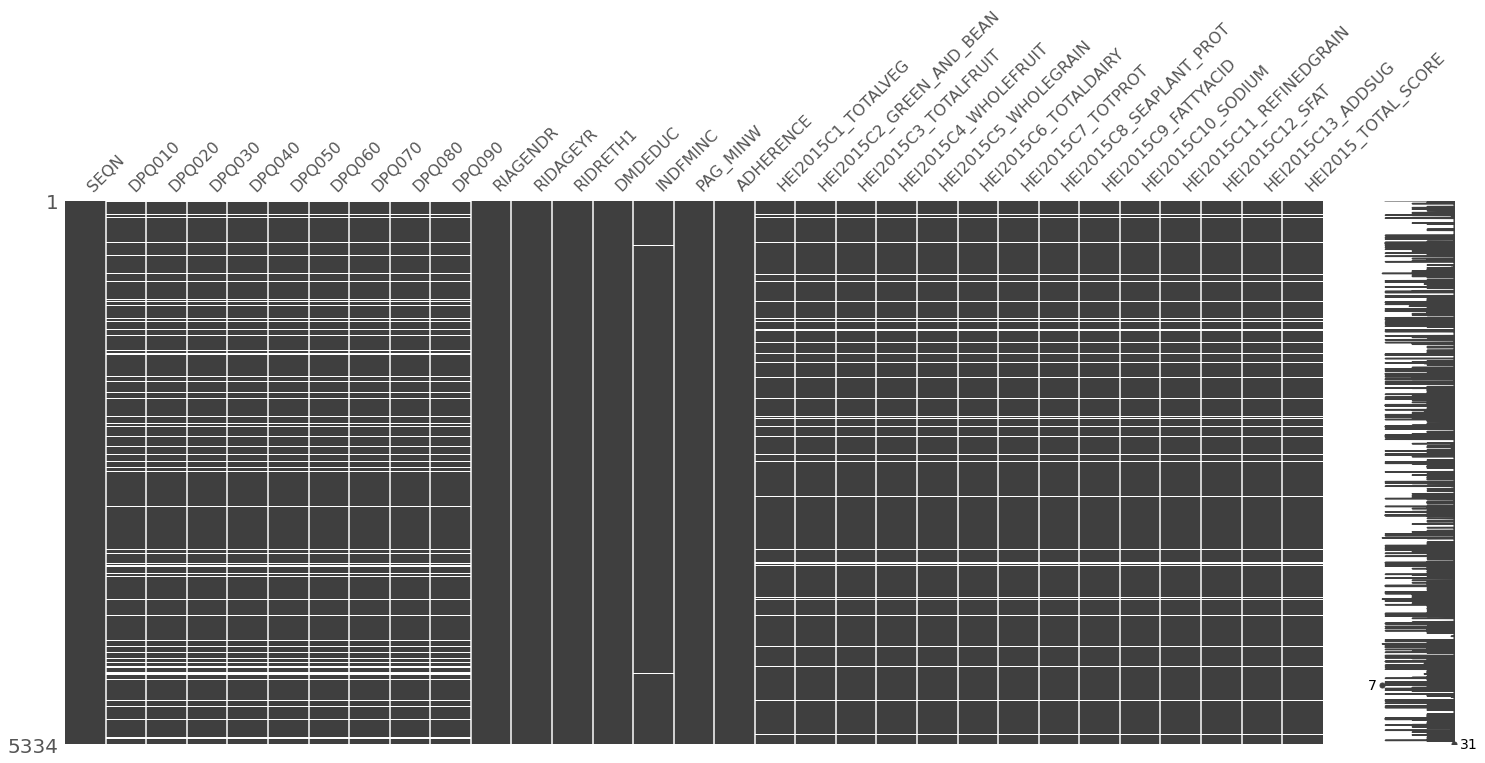

In [14]:
msno.matrix(df_original)
plt.show()

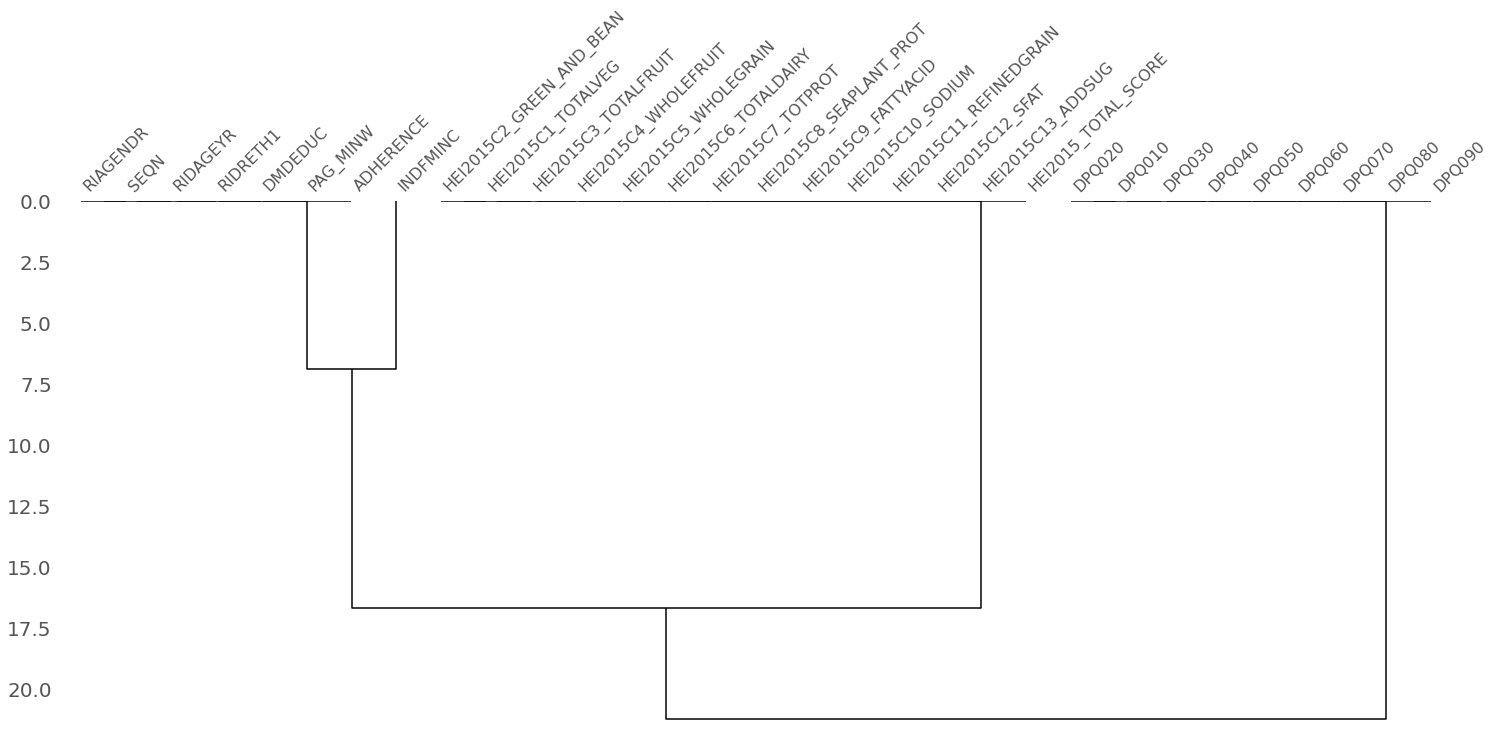

In [15]:
msno.dendrogram(df_original)
plt.show()

Como esperado, há uma relação direta observada no dendrograma e no gráfico matrix, portanto, as informações não foram preenchidas. Mais adiante iremos investigar se há alguma tendência observável nessas informações faltantes que possa criar um viés na análise. 

Iniciaremos a análise das variáveis de forma geral, de modo a identificar possíveis limpezas a serem feitas.

In [16]:
df_original.duplicated().sum()

0

In [17]:
df_original.drop(columns=['SEQN']).describe(percentiles = [.01, .05, .25, .5, .75, .95, .99]).round(2)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,5334.00,5334.00,5334.00,5334.00,5287.00,5334.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00
mean,0.31,0.31,0.55,0.72,0.32,0.21,0.23,0.15,0.05,1.52,45.09,2.87,3.23,8.74,471.77,1.98,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,0.76,0.71,0.93,0.91,0.74,0.62,0.64,0.59,0.33,0.50,20.15,1.13,1.27,12.78,780.35,0.92,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
1%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.81,0.00,0.00,0.00,0.00,0.00,0.00,24.68
5%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,1.00,1.00,2.00,0.00,1.00,0.68,0.00,0.00,0.00,0.00,0.42,2.17,0.00,0.00,0.00,0.00,0.00,0.00,30.79
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,3.00,2.00,4.00,35.00,1.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,43.00,3.00,3.00,7.00,210.00,2.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,62.00,4.00,4.00,10.00,568.93,3.00,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
95%,2.00,2.00,3.00,3.00,2.00,1.00,1.00,1.00,0.00,2.00,81.00,4.00,5.00,11.00,1863.05,3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19


É interessante destacar que através dos percentis 1%, 5%, 95% e 99% podemos observar o comportamento das extremidades dos dados, fato que é desconsiderado utilizando apenas os quartis.

Uma vez que uma semana tem no máximo 168 horas (10080 minutos), o valor máximo encontrado para PAG_MINW (10777 min/semana) não é um valor possível.
Assim, quando realizarmos o tratamento iremos limitar o valor máximo ao valor obtido no percentil de 99% (3672.06 min/semana). Além disso, para mais fácil interpretação, transformaremos os valores para horas por semana.

In [18]:
df_original[['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090']].agg(['value_counts'])

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
0.0,3850,3769,3152,2429,3813,4134,4070,4362,4667
1.0,673,769,1071,1706,691,513,545,341,122
2.0,180,179,286,370,160,95,118,79,32
3.0,124,114,320,326,168,89,99,45,13
9.0,9,5,7,5,4,5,4,9,2


Nas questões relativas à depressão do PHQ-9 vemos que a maior parte das respostas se concentra nas alternativas 0 e 1, indicando pouca frequencia ou ausencia de determinado sintoma, indica que a maior parte dos entrevistados diz não apresentar os sintomas em questão.

Vemos também que apesar de existir a opção "Se recusou a responder", não houve respostas marcadas desta forma (7).  <br>
Pouquíssimos foram os que assinalaram "Não saber a resposta" (9). <br>
Analisaremos mais a fundo estas, para definir a melhor abordagem, se trateremos como NaN ou iremos fazer inferência de valores.

In [19]:
nao_sabe = []
for i in range(10,100,10):
    nao_sabe = nao_sabe + df_original[df_original['DPQ0{}'.format(i)]==9].index.to_list() 
nao_sabe = sorted(list(set(nao_sabe))) # lista dos index em que há uma resposta "9 - Não sabe" para as questões do PHQ

In [20]:
df_auxiliar_9 = df_original[['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050',
                             'DPQ060','DPQ070','DPQ080','DPQ090']].loc[nao_sabe].copy() # Salvando os dados numa cópia
df_auxiliar_9.replace({9 : np.nan},inplace=True) # Substituindo valores 9 por NaN, facilitando a análise

In [21]:
df_auxiliar_9.head()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
49,0.0,0.0,NaN,NaN,0.0,3.0,0.0,NaN,0.0
453,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
965,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0
1117,0.0,NaN,1.0,1.0,NaN,0.0,NaN,2.0,0.0
1395,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Temos agora um dataframe apenas com os individuos que foi resperam "Não sabe". <br>
Calcularemos a média destas linhas, para identificar, com base nas outras respostas fornecidas, como está o indivíduo.

In [22]:
df_auxiliar_9['média'] = df_auxiliar_9.mean(axis=1).round(0)

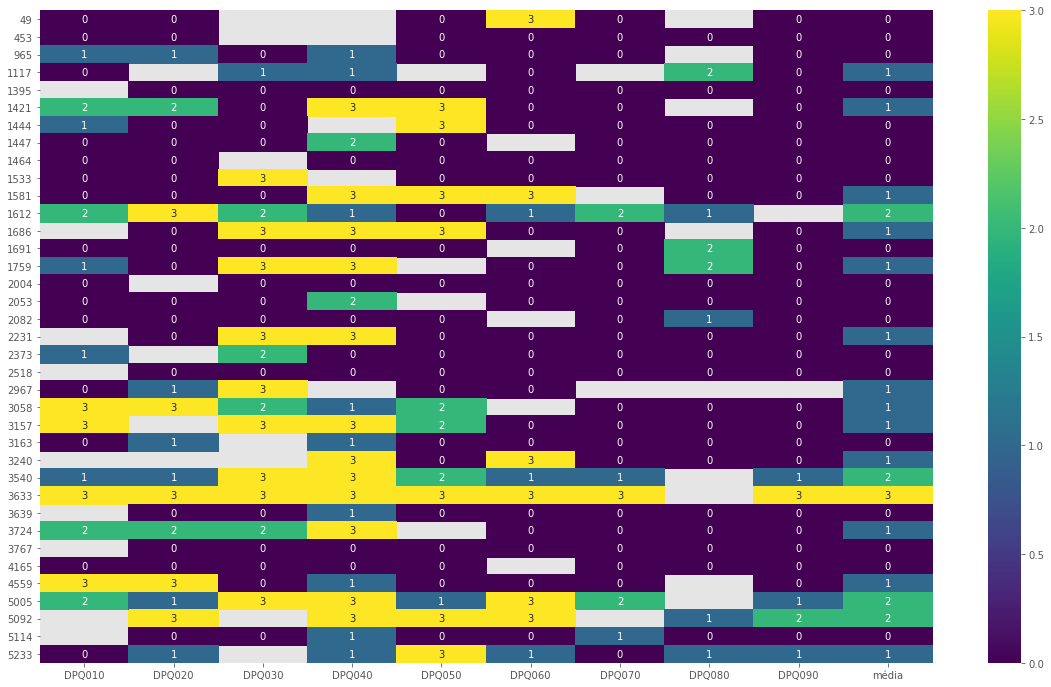

In [23]:
plt.figure(figsize=(20,12))
sns.heatmap(df_auxiliar_9, annot=True, cmap ="viridis")
plt.show()

A média parece completar bem as informação não respondidas, sendo coerentes com as demais respostas. <br>
Importante salientar que esta abordagem, pode, no entanto, criar uma tendência de aumentar a criticidade dos sintomas de depressão destes indivíduos, ao passo que tratá-los como NaN poderia estar, ao contrário, tratando-os com menor criticidade que a real, apesar de não criar distorção em relação aos dados orignais.

Analisaremos agora a distribuição das informações qualitativas (dados demográficos e aderência ao PAG).

In [24]:
print(df_original[['RIDRETH1']].value_counts(sort = False))
Dict_DEMO.loc[['RIDRETH1']]

RIDRETH1
1           1133
2            164
3           2516
4           1300
5            221
dtype: int64


,Descrição,Valores
Variável,,
RIDRETH1,Raça/Etnia,"1 = Mexicano americano, 2 = Outro hispânico, 3 = Branco não-hispãnico, 4 = Negro não-hispânico, 5 = Outra raça - Incluindo muti-racial"


Uma vez que os valores de "2 - Outro hispânico" e "5 - Outra raça" são baixos, e ambos representam outras etnias que não as especificadas, trataremos ambos como "5 - Outros".

In [25]:
print(df_original[['DMDEDUC']].value_counts(sort = False))
Dict_DEMO.loc[['DMDEDUC']]

DMDEDUC
1           618
2           936
3          1335
4          1498
5           939
7             4
9             4
dtype: int64


,Descrição,Valores
Variável,,
DMDEDUC,Escolaridade,"1 = Menor que 9o ano, 2 = 9-12o ano, 3 = Ensino médio, 4 = Ensino superior incompleto, 5 = Superior, completo ou maior, 7 = Se recusou a responder, 9 = Não sabe"


Para a escolaridade, um total de 8 indivíduos responderam que não sabem ou preferiram não responder. 

In [26]:
df_original[(df_original['DMDEDUC']==7) | (df_original['DMDEDUC']==9)]

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
1432,34036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,7,13.0,0.000000,1.0,1.361129,1.970055,1.329787,0.788022,0.0,3.697642,4.003152,2.019307,2.988063,10.000000,6.356816,8.734043,0.000000,43.248016
2099,35296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,84,3,7,2.0,9.237875,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106,35304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,4,9,99.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3631,38232,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,41,3,9,99.0,10.000000,1.0,4.655722,0.000000,5.000000,5.000000,0.0,5.000000,5.000000,0.336927,0.129504,3.239493,9.113747,3.591476,7.468841,48.535710
3871,38686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,18,4,9,3.0,0.000000,1.0,1.324754,0.000000,5.000000,1.466692,0.0,3.668549,5.000000,0.000000,2.997246,6.968626,6.980469,4.205715,8.283546,45.895598
4521,39906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,78,4,7,99.0,60.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,40447,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,74,1,9,99.0,105.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4973,40762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,58,3,7,6.0,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Não parece haver nenhuma tendência nestes dados que auxiliaria em inferí-los, portanto, optarei por susbstituí-los por NaN.

In [27]:
print(df_original[['INDFMINC']].value_counts(sort = False))
Dict_DEMO.loc[['INDFMINC']]

INDFMINC
1.0          190
2.0          281
3.0          440
4.0          412
5.0          426
6.0          678
7.0          535
8.0          485
9.0          297
10.0         278
11.0        1044
12.0          78
13.0          30
77.0          36
99.0          77
dtype: int64


,Descrição,Valores
Variável,,
INDFMINC,Renda anual familiar (US$),"1 = 0-4999, 2 - 5000-9999, 3 = 10000-14999, 4 = 15000-19999, 5 = 20000-24999, 6 = 25000-34999, 7 = 35000-44999, 8 = 45000-54999, 9 = 55000-, 64999, 10 = 65000-74999, 11 = Maior ou igual a 75000, 12 = Maior que 20000, 13 = Menor que 20000, 77 = Se recusou a responder, 99 = Não sabe"


Podemos notar pelo dicionário que temos categorias de renda que se sobrepõe. As categorias 12 e 13 possuem intervalos de valores que já estão categorizados mais detalhadamente em outras respostas. Isso será lidado adiante.

In [28]:
df_original[(df_original['INDFMINC']==77) | (df_original['INDFMINC']==99)]

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
99,31323,0.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,1,83,3,1,99.0,101.616628,1.0,5.000000,0.000000,1.448952,2.897905,1.634715,5.000000,4.574231,0.000000,6.482251,1.292911,9.068034,8.063865,5.826903,51.289768
135,31400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,78,3,4,99.0,55.427252,1.0,3.759541,3.948462,2.337905,4.675810,1.468551,0.767312,5.000000,5.000000,10.000000,5.089129,2.968911,10.000000,3.805017,58.820639
178,31492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,19,2,2,99.0,117.782910,1.0,3.485290,5.000000,2.569242,3.826531,1.243926,4.507737,5.000000,5.000000,10.000000,7.661160,5.958017,10.000000,6.405622,70.657525
179,31496,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2,51,1,4,77.0,484.988453,3.0,5.000000,5.000000,2.548131,0.877690,0.000000,5.000000,3.220838,0.679502,9.641452,3.135775,4.352888,4.799632,6.029561,50.285468
197,31524,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,52,3,3,99.0,0.000000,1.0,3.898093,4.275140,2.616131,0.000000,0.000000,4.888679,0.576825,0.000000,8.555913,5.118825,0.000000,10.000000,0.000000,39.929606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,41154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,18,4,2,99.0,1619.769053,3.0,3.076980,0.912039,4.737535,2.634779,3.323875,5.000000,2.505067,0.000000,3.408204,5.256046,0.000000,7.556141,7.246838,45.657505
5202,41223,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,42,4,2,99.0,420.000000,3.0,1.808434,0.000000,0.035271,0.000000,2.483070,5.000000,3.470655,0.000000,1.962636,4.257587,2.200000,1.685736,6.829889,29.733279
5209,41237,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,31,1,2,99.0,277.136259,2.0,3.531637,0.000000,0.592627,0.088452,0.000000,2.307910,5.000000,0.000000,9.637797,7.076139,5.323408,7.289697,0.743466,41.591133
5275,41368,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2,59,3,1,77.0,332.563510,3.0,5.000000,0.000000,2.369514,0.292132,5.000000,5.000000,5.000000,5.000000,10.000000,2.025448,8.693119,10.000000,6.035861,64.416074


Novamente, para evitar distorções no dataset, os "Não sabe" e "Se recusou a responder" serão substituídos por NaN.<br>

In [29]:
print(df_original[['RIAGENDR']].value_counts(sort = False))
Dict_DEMO.loc[['RIAGENDR']]

RIAGENDR
1           2561
2           2773
dtype: int64


,Descrição,Valores
Variável,,
RIAGENDR,Gênero,"1 = Masculino, 2 = Feminino"


In [30]:
print(df_original[['ADHERENCE']].value_counts(sort = False))
Dict_PAG_HEI.loc[['ADHERENCE']]

ADHERENCE
1.0          2304
2.0           834
3.0          2196
dtype: int64


,Descrição,Valores
Variável,,
ADHERENCE,Grupo de aderência ao Physical Activity Guideline (PAG),"1 = Baixo (< 150 min/semana), 2 = Adequado (150-300 min/semana), 3 = Acima (> 300min/semana)"


#### Pre-processamento dos dados

Desta forma, as seguintes tratamentos serão feitos:<br>
- Para as questões do PQH-9 (DPQ010 a DPQ090) os valores 7 e 9 serão substituídos pela média encontrada por indivíduo nas demais questões.
- Para a Escolaridade (DMDEDUC) os valores 7 e 9 serão substituídos por NaN. <br>
- Para a Etnia (RIDRETH1) os grupos identificados como "outros" serão agrupados.<br>
- Para a Renda (INDFMINC) os valores 77 e 99 serão substituídos por NaN. <br>
- A Renda (INDFMINC) será convertida em uma média da faixa de renda, de modo a convertê-la numa variável quantitativa. Para as faixas que possuem apenas um limite, este será considerado. 
- Limitarmos o valor máximo de PAG_MINW para o valor do percentil 99%, assim como transformaremos os valores em horas por semana.
- Converteremos as variáveis categóricas nominais no data type Category.

In [31]:
df = df_original.copy()

In [32]:
replace_map = {
    # 7 e 9 serão substituídos por missing para as variáveis DPQ0X0, para serem preenchidos em sequência
    'DPQ010': {7 : np.nan, 9 : np.nan},
    'DPQ020': {7 : np.nan, 9 : np.nan},
    'DPQ030': {7 : np.nan, 9 : np.nan},
    'DPQ040': {7 : np.nan, 9 : np.nan},
    'DPQ050': {7 : np.nan, 9 : np.nan},
    'DPQ060': {7 : np.nan, 9 : np.nan},
    'DPQ070': {7 : np.nan, 9 : np.nan},
    'DPQ080': {7 : np.nan, 9 : np.nan},
    'DPQ090': {7 : np.nan, 9 : np.nan},
    'DMDEDUC': {7 : np.nan, 9 : np.nan},
    'RIDRETH1': {2: 5}, # Outro hispânico e Outros serão unidos em uma única categoria
    # transformando variavel categórica de renda em variável quantitativa através do ponto médio de cada categoria
    'INDFMINC': {1: np.mean([0,4999]), 2: np.mean([5000,9999]), 3: np.mean([10000,14999]),4: np.mean([15000,19999]),
                 5: np.mean([20000,24999]),6: np.mean([25000,34999]), 7: np.mean([35000,44999]), 8: np.mean([45000,54999]),
                 9: np.mean([55000,64999]), 10: np.mean([65000,74999]), 11: 75000, 12: np.mean([20000, 90000]),
                 13: np.mean([0, 19999]), 77: np.nan, 99: np.nan}
}

In [33]:
df = df.replace(replace_map)

Criaremos temporariamente uma coluna com a média das respostas do questionário PHQ-9. A partir dele, para os casos em que o valor for Null substituiremos pela média obtida.

In [34]:
df['média_temporaria'] = df[['DPQ010','DPQ020','DPQ030','DPQ040','DPQ050',
                             'DPQ060','DPQ070','DPQ080','DPQ090']].mean(axis=1).round(0)

In [35]:
df['DPQ010'] = np.where(df['DPQ010'].isnull(), df['média_temporaria'], df['DPQ010'])
df['DPQ020'] = np.where(df['DPQ020'].isnull(), df['média_temporaria'], df['DPQ020'])
df['DPQ030'] = np.where(df['DPQ030'].isnull(), df['média_temporaria'], df['DPQ030'])
df['DPQ040'] = np.where(df['DPQ040'].isnull(), df['média_temporaria'], df['DPQ040'])
df['DPQ050'] = np.where(df['DPQ050'].isnull(), df['média_temporaria'], df['DPQ050'])
df['DPQ060'] = np.where(df['DPQ060'].isnull(), df['média_temporaria'], df['DPQ060'])
df['DPQ070'] = np.where(df['DPQ070'].isnull(), df['média_temporaria'], df['DPQ070'])
df['DPQ080'] = np.where(df['DPQ080'].isnull(), df['média_temporaria'], df['DPQ080'])
df['DPQ090'] = np.where(df['DPQ090'].isnull(), df['média_temporaria'], df['DPQ090'])

Uma vez substituição feita, podemos retirar de nosso dataframe a coluna que foi adicionada.

In [36]:
df.drop('média_temporaria',axis=1, inplace=True)

Finalmente, como decidido anteriormente, limitarmos o valor máximo de PAG_MINW para o valor do percentil 99%, assim como transformaremos os valores em horas por semana.

In [37]:
df['PAG_HRW_trunc'] = np.where(df['PAG_MINW'] > 3672.06, 3672.06, df['PAG_MINW'])/60

In [38]:
df[['PAG_MINW', 'PAG_HRW_trunc']].describe(percentiles = [.05,.25, .5, .75, .95, .99]).round(2)

,PAG_MINW,PAG_HRW_trunc
count,5334.00,5334.00
mean,471.77,7.59
std,780.35,11.11
min,0.00,0.00
5%,0.00,0.00
25%,35.00,0.58
50%,210.00,3.50
75%,568.93,9.48
95%,1863.05,31.05
99%,3672.06,61.20


Por fim, as variáveis categóricas nominais serão convertidas no data type 'Category'.

In [39]:
df['RIAGENDR'] = df['RIAGENDR'].astype('category')
df['RIDRETH1'] = df['RIDRETH1'].astype('category')
df['DMDEDUC'] = df['DMDEDUC'].astype('category')

Criaremos agora duas novas variáveis, a primeira (PHQ9) contendo a soma das respostas do PHQ-9, obtendo uma pontuação total do indivíduo, que pode variar de 0 a 27, e a segunda (PHQ_GRP) dividindo estes indivíduos em nos 5 grupo de sintomas de depressão:
- 0: “sem sintomas” se PHQ9 < 5,
- 1: “sintomas leves” se 5 <= PHQ9 < 10, 
- 2: “sintomas moderados” se 10 <= PHQ9 < 15, 
- 3: “sintomas moderadamente severos” se 15 <= PHQ9 < 20 
- 4: “sintomas severos” se PHQ9 >= 20

In [40]:
df['PHQ9'] = df[["DPQ010", "DPQ020", "DPQ030", "DPQ040", "DPQ050",
                 "DPQ060", "DPQ070","DPQ080","DPQ090"]].sum(axis=1, skipna = False) 
# skipna = False de modo que quando não há informações ele não resulte em 0, mas sim em NaN

In [41]:
df['PHQ_GRP'] = pd.cut(df['PHQ9'], [0,5,9,14,19,100], include_lowest=True, right=True, labels=[0,1,2,3,4])

In [42]:
df.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PAG_HRW_trunc,PHQ9,PHQ_GRP
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4.0,17499.5,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4.0,75000.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,4.411855,0.0,0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5.0,75000.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,22.555812,0.0,0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3.0,55000.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,16.857968,0.0,0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,5,3.0,75000.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,28.819092,4.0,0


In [43]:
df[["PHQ_GRP"]].value_counts(sort = False)

PHQ_GRP
0          4032
1           495
2           209
3            75
4            25
dtype: int64

Uma vez que há poucos indivídulos nos grupos 3 e 4, iremos reagrupá-los em apenas 3 categorias:
- 0 = Sem sintomas
- 1 = Sintomas leves
- 2 = Sintomas moderados a severos

In [44]:
df["PHQ_GRP"] = df["PHQ_GRP"].replace([3, 4], 2)

In [45]:
df[["PHQ_GRP"]].value_counts(sort = False)

PHQ_GRP
0          4032
1           495
2           309
dtype: int64

In [46]:
null = df.isna().mean()*100
null[null > 0].sort_values(ascending=False)

DPQ010                      9.336333
DPQ070                      9.336333
PHQ9                        9.336333
DPQ020                      9.336333
DPQ090                      9.336333
DPQ080                      9.336333
PHQ_GRP                     9.336333
DPQ060                      9.336333
DPQ030                      9.336333
DPQ040                      9.336333
DPQ050                      9.336333
HEI2015C8_SEAPLANT_PROT     5.136858
HEI2015_TOTAL_SCORE         5.136858
HEI2015C13_ADDSUG           5.136858
HEI2015C12_SFAT             5.136858
HEI2015C11_REFINEDGRAIN     5.136858
HEI2015C10_SODIUM           5.136858
HEI2015C9_FATTYACID         5.136858
HEI2015C7_TOTPROT           5.136858
HEI2015C6_TOTALDAIRY        5.136858
HEI2015C5_WHOLEGRAIN        5.136858
HEI2015C4_WHOLEFRUIT        5.136858
HEI2015C2_GREEN_AND_BEAN    5.136858
HEI2015C1_TOTALVEG          5.136858
HEI2015C3_TOTALFRUIT        5.136858
INDFMINC                    2.999625
DMDEDUC                     0.149981
d

## 5. EDA: Análise Univariada <a name="EDAUnivariada"></a>

Faremos uma análise univariada para entender a distribuição dos dados. <br>
Para isso, criaremos listas e bibliotecas a serem utilizadas para facilitar a análise e plotagem de gráficos.

In [47]:
# Lista das variáveis quantitativas
var_quant = [
    "RIDAGEYR", 
    "INDFMINC", 
    "PAG_HRW_trunc",
    "HEI2015C1_TOTALVEG",
    "HEI2015C2_GREEN_AND_BEAN",
    "HEI2015C3_TOTALFRUIT",
    "HEI2015C4_WHOLEFRUIT",
    "HEI2015C5_WHOLEGRAIN",
    "HEI2015C6_TOTALDAIRY",
    "HEI2015C7_TOTPROT",
    "HEI2015C8_SEAPLANT_PROT",
    "HEI2015C9_FATTYACID",
    "HEI2015C10_SODIUM",
    "HEI2015C11_REFINEDGRAIN",
    "HEI2015C12_SFAT",
    "HEI2015C13_ADDSUG",
    "HEI2015_TOTAL_SCORE",
    "PHQ9"]


In [48]:
# Título relacionado à variávei quantitativa
titulo_quant = {
    "RIDAGEYR" : 'Idade em anos', 
    "INDFMINC" : 'Renda anual familiar (US$)', 
    "PAG_HRW_trunc" : 'Atividade Física (h/semana)',
    "HEI2015C1_TOTALVEG" : 'Total de Vegetais',
    "HEI2015C2_GREEN_AND_BEAN" : 'Verduras verdeescuras \n e leguminosas',
    "HEI2015C3_TOTALFRUIT" : 'Frutas totais',
    "HEI2015C4_WHOLEFRUIT" : 'Frutas in natura',
    "HEI2015C5_WHOLEGRAIN" : 'Grãos integrais',
    "HEI2015C6_TOTALDAIRY" : 'Laticínios',
    "HEI2015C7_TOTPROT" : 'Proteínas',
    "HEI2015C8_SEAPLANT_PROT" : 'Plantas marinhas \n e proteínas vegetais',
    "HEI2015C9_FATTYACID" : 'Ácido-graxo',
    "HEI2015C10_SODIUM" : 'Sódio',
    "HEI2015C11_REFINEDGRAIN" : 'Grãos refinados',
    "HEI2015C12_SFAT" : 'Gordura saturada',
    "HEI2015C13_ADDSUG" : 'Açúcares adicionados',
    "HEI2015_TOTAL_SCORE" : 'Healthy Eating Index',
    "PHQ9" : 'Pontuação PHQ'}

In [49]:
# Lista  das variáveis qualitativas
var_quali = [
    "RIAGENDR",
    "RIDRETH1",
    "DMDEDUC",
    "ADHERENCE",
    'DPQ010',
    'DPQ020',
    'DPQ030',
    'DPQ040',
    'DPQ050',
    'DPQ060',
    'DPQ070',
    'DPQ080',
    'DPQ090',
    "PHQ_GRP"]

In [50]:
# Título relacionado à variávei qualitativa
titulo_quali = {
    "RIAGENDR": 'Gênero',
    "RIDRETH1": 'Etnia',
    "DMDEDUC": 'Escolaridade',
    "ADHERENCE": 'Aderência ao PAG',
    'DPQ010' : 'Pouco interesse/ prazer',
    'DPQ020' : 'Deprimido ou sem perspectiva',
    'DPQ030' : 'Falta ou excesso de sono',
    'DPQ040' : 'Cansado ou pouca energia',
    'DPQ050' : 'Falta ou excesso de apetite',
    'DPQ060' : 'Se sentiu mal consigo mesmo',
    'DPQ070' : 'Dificuldade para se concentrar',
    'DPQ080' : 'Muito lento ou agitado',
    'DPQ090' : 'Pensou em se ferir',
    "PHQ_GRP": 'Grau dos sintomas de depressão'}

In [51]:
# Legenda das categorias de cada variável qualitativa
legenda_quali = {
    "RIAGENDR": {1: 'Masculino', 2: 'Feminino'},
    "RIDRETH1": {1: 'Americano Mexicano', 3: 'Branco \n não hispânico', 4: 'Negro \n não hispânico', 5:'Outro'},
    "DMDEDUC": {1: "< 9 ano", 2: "9-12 ano", 3: "Ensino \n médio", 4: "Superior \n incompleto", 5: "Superior \n completo"},
    "ADHERENCE": {1: 'Baixo', 2: 'Adequado', 3: 'Acima'},
    'DPQ010' : {0:'Nenhuma \n vez', 1:'Menos de \n 1 semana', 2:'1 semana \n ou mais', 3:'Quase todos \n os dias'},
    'DPQ020' : {0:'Nenhuma \n vez', 1:'Menos de \n 1 semana', 2:'1 semana \n ou mais', 3:'Quase todos \n os dias'},
    'DPQ030' : {0:'Nenhuma \n vez', 1:'Menos de \n 1 semana', 2:'1 semana \n ou mais', 3:'Quase todos \n os dias'},
    'DPQ040' : {0:'Nenhuma \n vez', 1:'Menos de \n 1 semana', 2:'1 semana \n ou mais', 3:'Quase todos \n os dias'},
    'DPQ050' : {0:'Nenhuma \n vez', 1:'Menos de \n 1 semana', 2:'1 semana \n ou mais', 3:'Quase todos \n os dias'},
    'DPQ060' : {0:'Nenhuma \n vez', 1:'Menos de \n 1 semana', 2:'1 semana \n ou mais', 3:'Quase todos \n os dias'},
    'DPQ070' : {0:'Nenhuma \n vez', 1:'Menos de \n 1 semana', 2:'1 semana \n ou mais', 3:'Quase todos \n os dias'},
    'DPQ080' : {0:'Nenhuma \n vez', 1:'Menos de \n 1 semana', 2:'1 semana \n ou mais', 3:'Quase todos \n os dias'},
    'DPQ090' : {0:'Nenhuma \n vez', 1:'Menos de \n 1 semana', 2:'1 semana \n ou mais', 3:'Quase todos \n os dias'},
    "PHQ_GRP": {0: "Sem sintomas", 1: "Sintomas \n leves", 2: "Sintomas \n moderados-severos"}}

In [52]:
# Lista das categorias para plotagem das varáveis qualitativas de forma ordenada
ordem_quali = {
    "RIAGENDR": ['Masculino','Feminino'],
    "RIDRETH1": ['Americano Mexicano','Branco \n não hispânico','Negro \n não hispânico','Outro'],
    "DMDEDUC": ["< 9 ano","9-12 ano","Ensino \n médio","Superior \n incompleto","Superior \n completo"],
    "ADHERENCE": ['Baixo','Adequado','Acima'],
    'DPQ010' : ['Nenhuma \n vez','Menos de \n 1 semana','1 semana \n ou mais','Quase todos \n os dias'],
    'DPQ020' : ['Nenhuma \n vez','Menos de \n 1 semana','1 semana \n ou mais','Quase todos \n os dias'],
    'DPQ030' : ['Nenhuma \n vez','Menos de \n 1 semana','1 semana \n ou mais','Quase todos \n os dias'],
    'DPQ040' : ['Nenhuma \n vez','Menos de \n 1 semana','1 semana \n ou mais','Quase todos \n os dias'],
    'DPQ050' : ['Nenhuma \n vez','Menos de \n 1 semana','1 semana \n ou mais','Quase todos \n os dias'],
    'DPQ060' : ['Nenhuma \n vez','Menos de \n 1 semana','1 semana \n ou mais','Quase todos \n os dias'],
    'DPQ070' : ['Nenhuma \n vez','Menos de \n 1 semana','1 semana \n ou mais','Quase todos \n os dias'],
    'DPQ080' : ['Nenhuma \n vez','Menos de \n 1 semana','1 semana \n ou mais','Quase todos \n os dias'],
    'DPQ090' : ['Nenhuma \n vez','Menos de \n 1 semana','1 semana \n ou mais','Quase todos \n os dias'],
    "PHQ_GRP": ["Sem sintomas", "Sintomas \n leves", "Sintomas \n moderados-severos"]}

#### Distribuição das variáveis quantitativas

In [53]:
var_quant2 = np.array(var_quant).reshape(6,3)

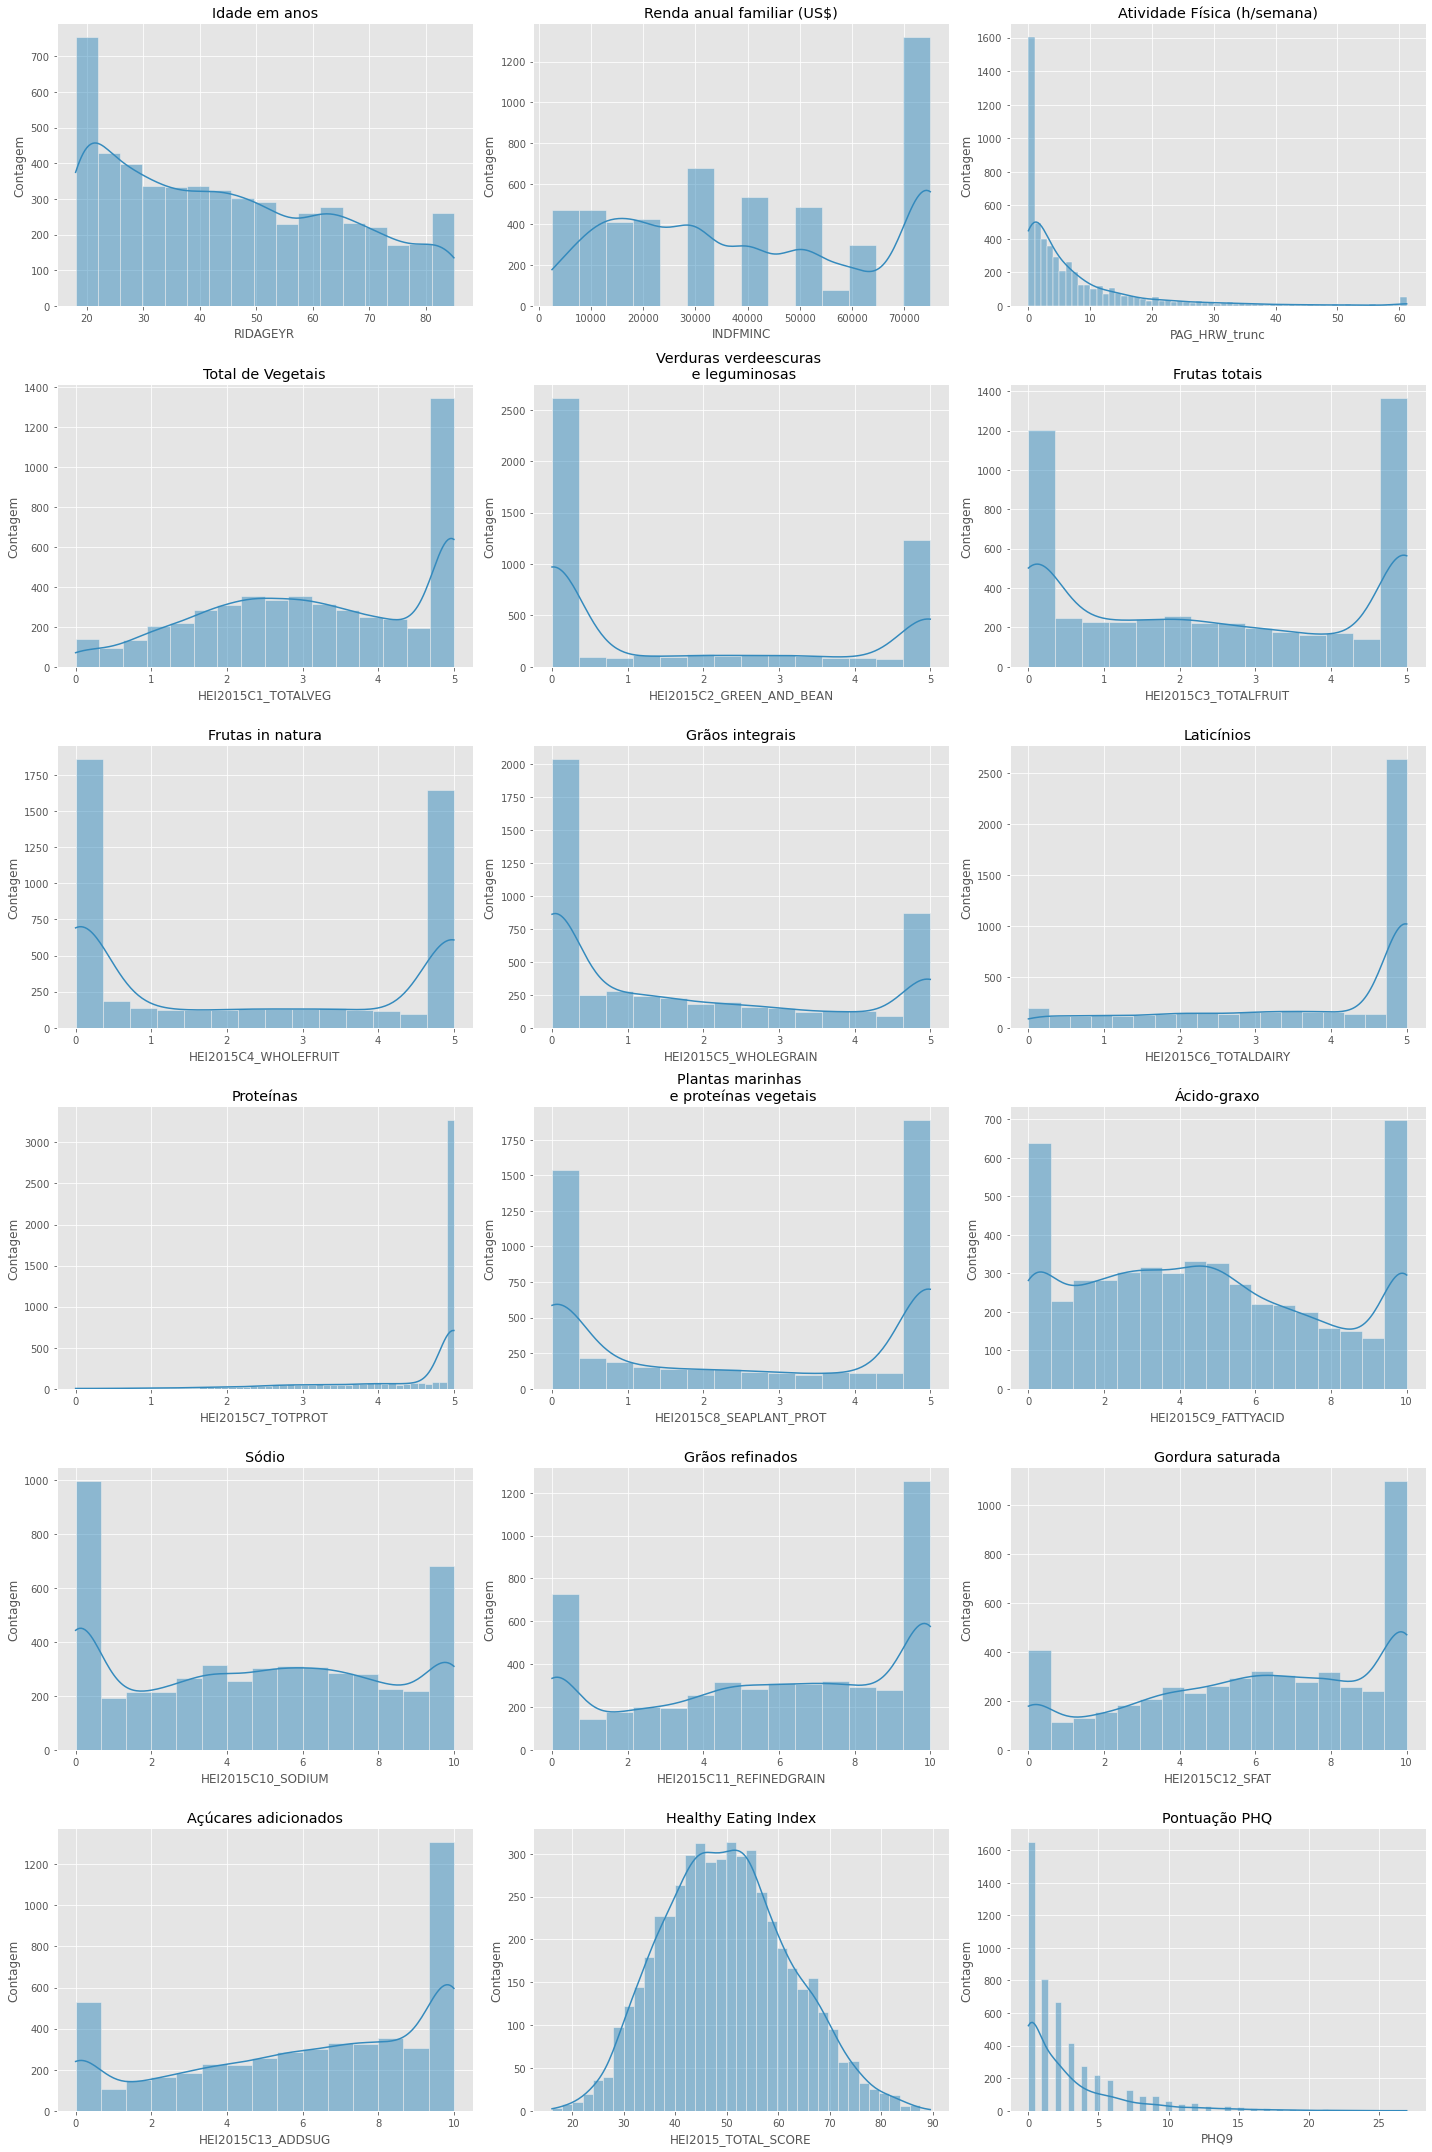

In [54]:
fig, eixo = plt.subplots(6,3,figsize=(20,30)) 

for row in range(var_quant2.shape[0]):
    for column in range(var_quant2.shape[1]):
        sns.histplot(df, ax=eixo[row][column], x=var_quant2[row][column], kde=True)
        eixo[row][column].set_ylabel('Contagem')
        eixo[row][column].set_title(titulo_quant[var_quant2[row][column]])

plt.tight_layout()
plt.show()

Para os dados de hábitos alimentares, vemos que de modo geral a maioria os dados se concentram nos extremos. Desta forma, optamos por tratar estas variáveis como qualitativas, dividindo-as em 2 grupos, valores até 50% do valor máximo e valores acima de 50%.<br>
Já para o valor da pontuação HEI total temos uma distribuição normal. 

In [55]:
lista_HEI = ['HEI2015C1_TOTALVEG','HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT','HEI2015C4_WHOLEFRUIT',
             'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
             'HEI2015C9_FATTYACID','HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG']

In [56]:
for categoria in lista_HEI:
    conditions = [
        (df[categoria].isna()),
        (df[categoria] == df[categoria].min()),
        (df[categoria] > df[categoria].min()) & (df[categoria] < df[categoria].max()),
        (df[categoria] == df[categoria].max())]
    values = [np.nan, 0, 1, 2]
    
    df[categoria] = np.select(conditions, values) 
    
    legenda_quali[categoria] = {0:'Mínimo', 1:'Intermediário', 2:'Máximo'}
    ordem_quali[categoria] = ['Mínimo','Intermediário', 'Máximo']

Como a variável PAG_HRW é bastante assimétrica, podemos também criar uma versão com o log, buscando uma distribuição mais semelhante a uma normal.

In [57]:
df["PAG_HRW_log"] = np.log(df["PAG_HRW_trunc"] + 1)

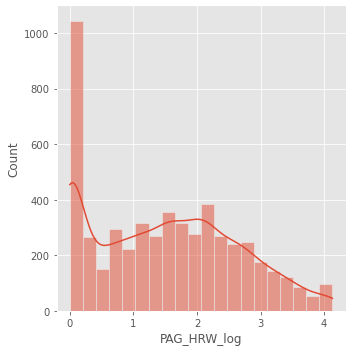

In [58]:
sns.displot(df, x="PAG_HRW_log", kde=True)
plt.show()

In [59]:
titulo_quant['PAG_HRW_log']='Log Atividade Física (h/semana)'

#### Distribuição das variáveis qualitativas

In [60]:
var_quali2 = var_quali.copy()
var_quali2.append('')

var_quali2 = np.array(var_quali2).reshape(5,3)

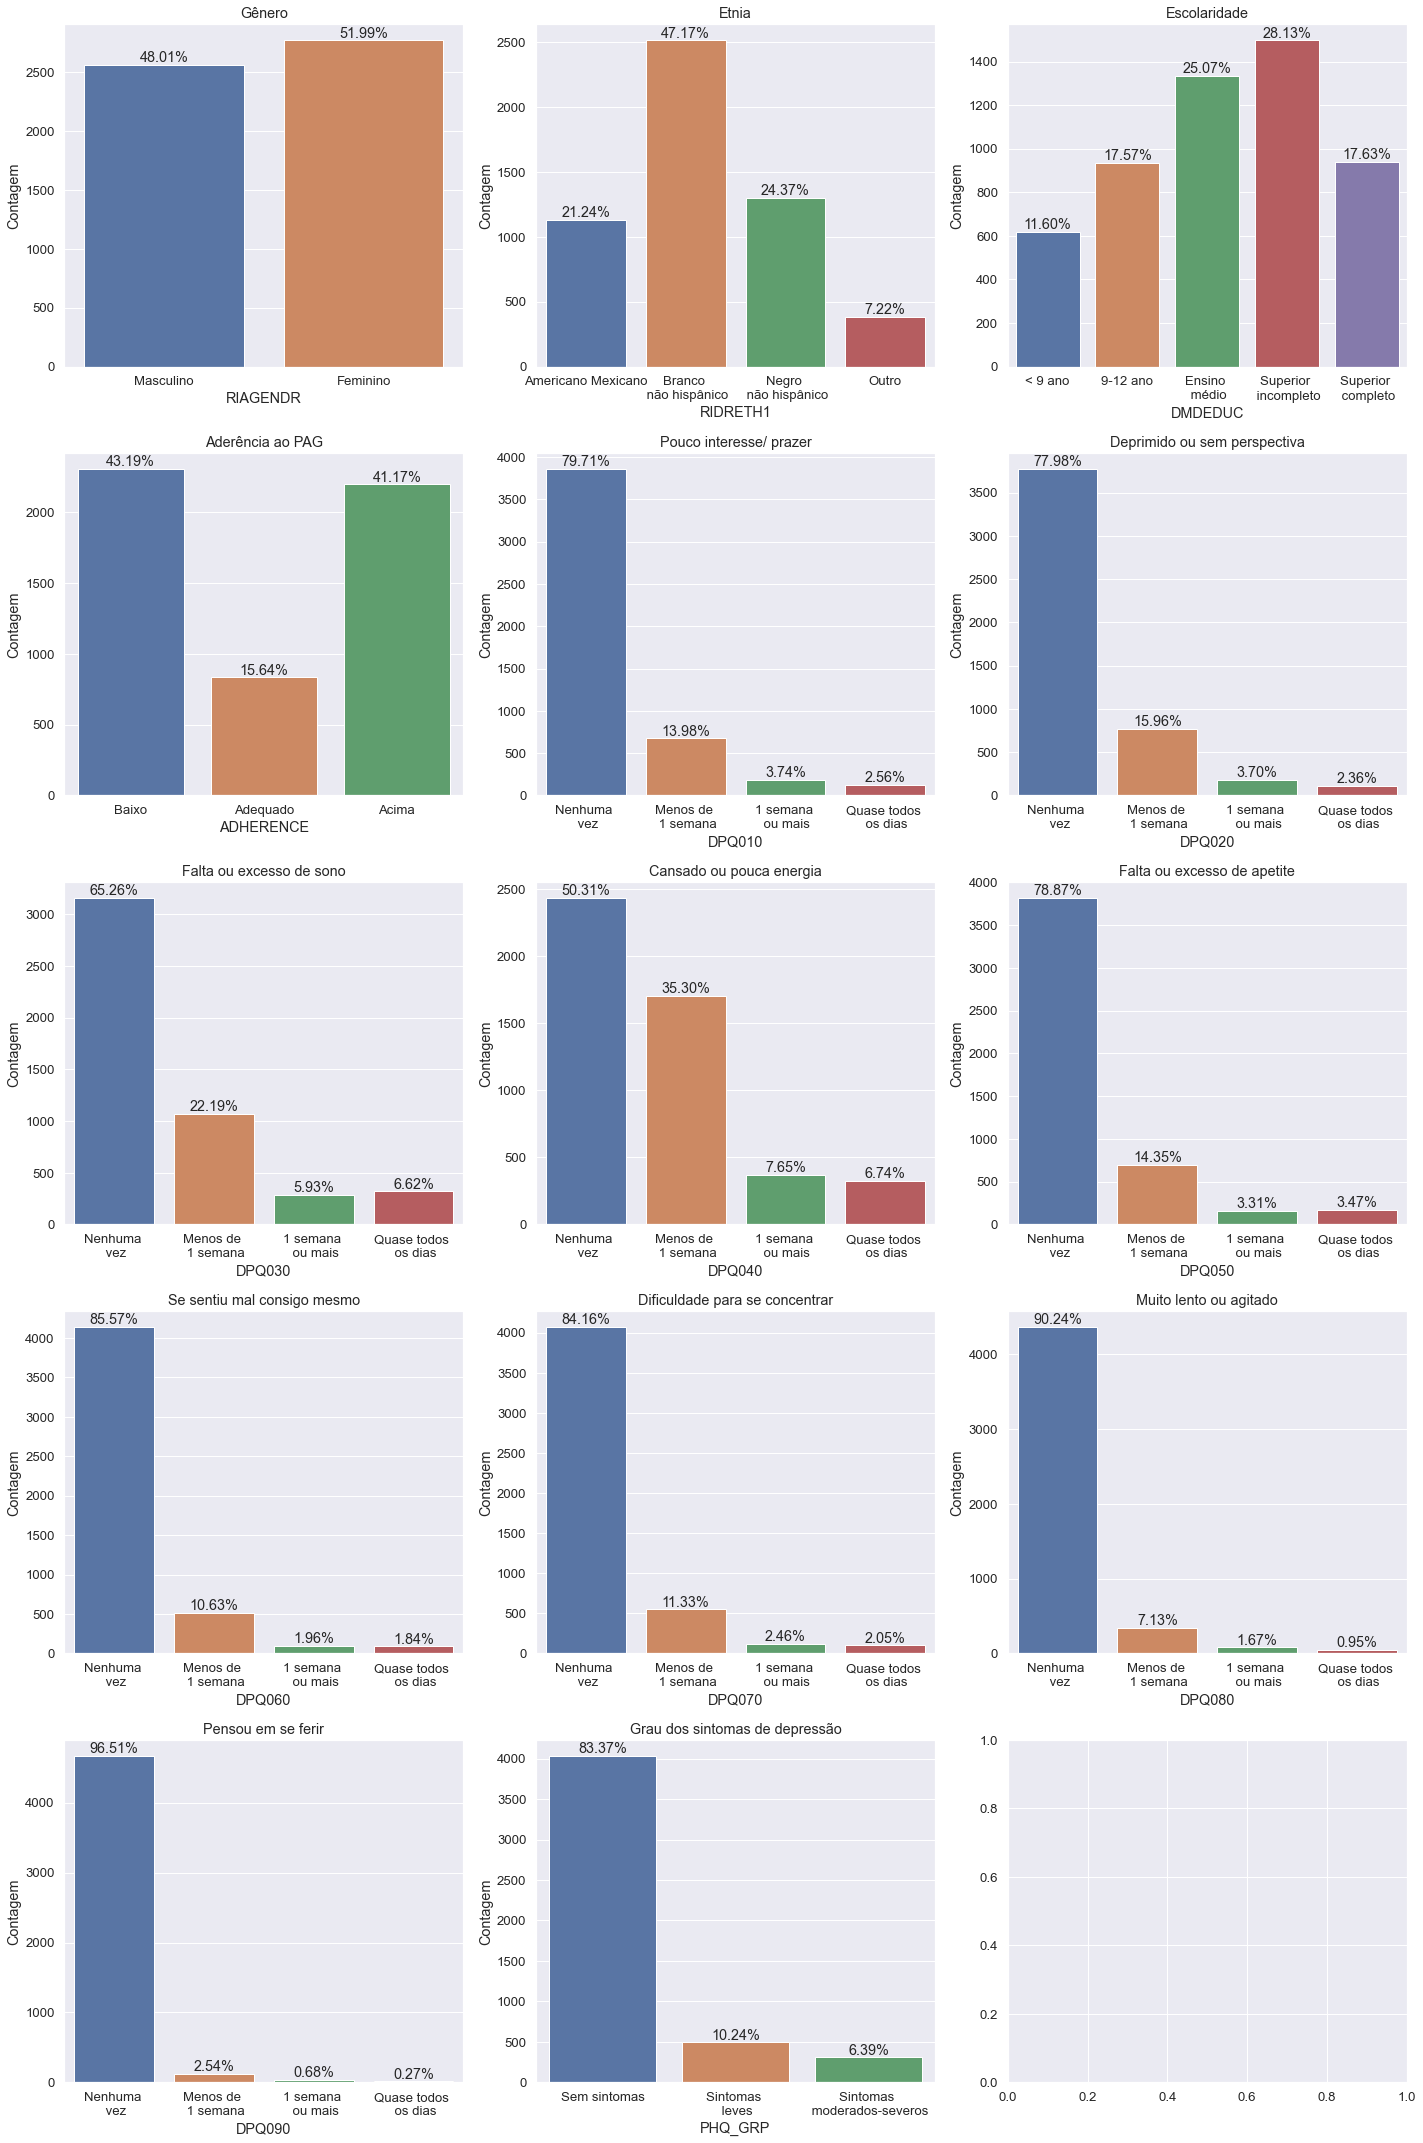

In [61]:
sns.set(font_scale=1.2)
fig, eixo = plt.subplots(5,3,figsize=(20,30)) 

for row in range(var_quali2.shape[0]):
    for column in range(var_quali2.shape[1]):
        if var_quali2[row][column]!='':
            sns.countplot(ax=eixo[row][column], x=df.replace(legenda_quali)[var_quali2[row][column]],order = ordem_quali[var_quali2[row][column]])
            eixo[row][column].set_ylabel('Contagem')
            eixo[row][column].set_title(titulo_quali[var_quali2[row][column]])
        else:
            pass
        if var_quali2[row][column]!='':
            ncount=df[var_quali2[row][column]].count()
            for p in eixo[row][column].patches:
                x=p.get_bbox().get_points()[:,0]
                y=p.get_bbox().get_points()[1,1]
                eixo[row][column].annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                        ha='center', va='bottom') # set the alignment of the text
        
plt.tight_layout()        
plt.show()

#### Análise dos valores Null

Faremos uma investigação dos dados Null, analisando se parece haver alguma tendência nestes indivíduos que possa criar falsas conclusões no estudo. <br>
Dividiremos esta investigação em duas etapas, avaliando os dados faltantes do questionário PHQ-9 e dados faltantes do HEI separadamente.

In [62]:
PHQ_null = df[df['PHQ9'].isna()][['PHQ_GRP','RIAGENDR','RIDAGEYR','RIDRETH1','DMDEDUC',
                                  'INDFMINC','PAG_HRW_trunc','ADHERENCE','HEI2015_TOTAL_SCORE']]

In [63]:
print(f"{((df['PHQ9'].isna().mean())*100).round(2)}% dos dados de PHQ são Null")

9.34% dos dados de PHQ são Null


In [64]:
null_quali = ['RIAGENDR','RIDRETH1', 'DMDEDUC','ADHERENCE']
null_quant = ['RIDAGEYR','INDFMINC','PAG_HRW_trunc','HEI2015_TOTAL_SCORE']

null_quali = np.array(null_quali).reshape(2,2)
null_quant = np.array(null_quant).reshape(2,2)

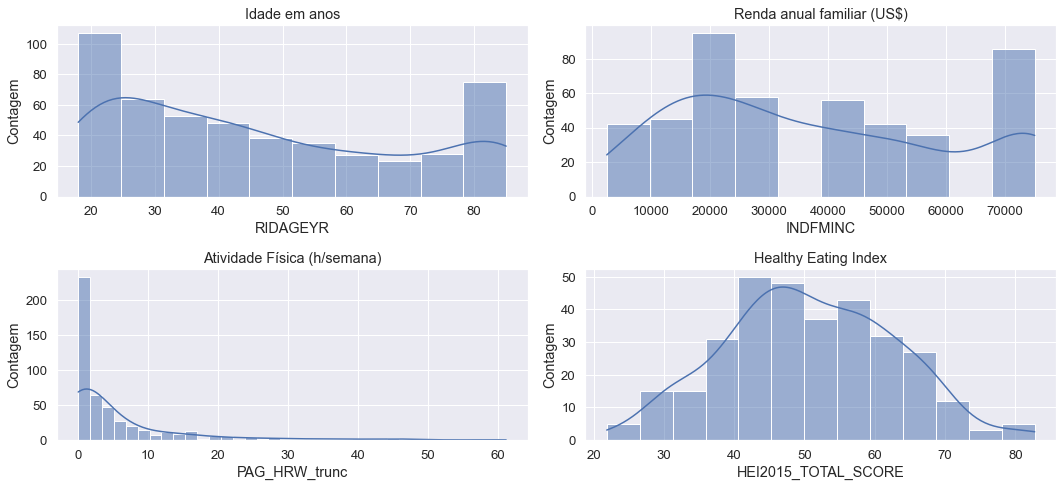

In [65]:
fig, eixo = plt.subplots(2,2,figsize=(15,7)) 

for row in range(null_quant.shape[0]):
    for column in range(null_quant.shape[1]):
        sns.histplot(PHQ_null, ax=eixo[row][column], x=null_quant[row][column], kde=True)
        eixo[row][column].set_ylabel('Contagem')
        eixo[row][column].set_title(titulo_quant[null_quant[row][column]])

plt.tight_layout()
plt.show()

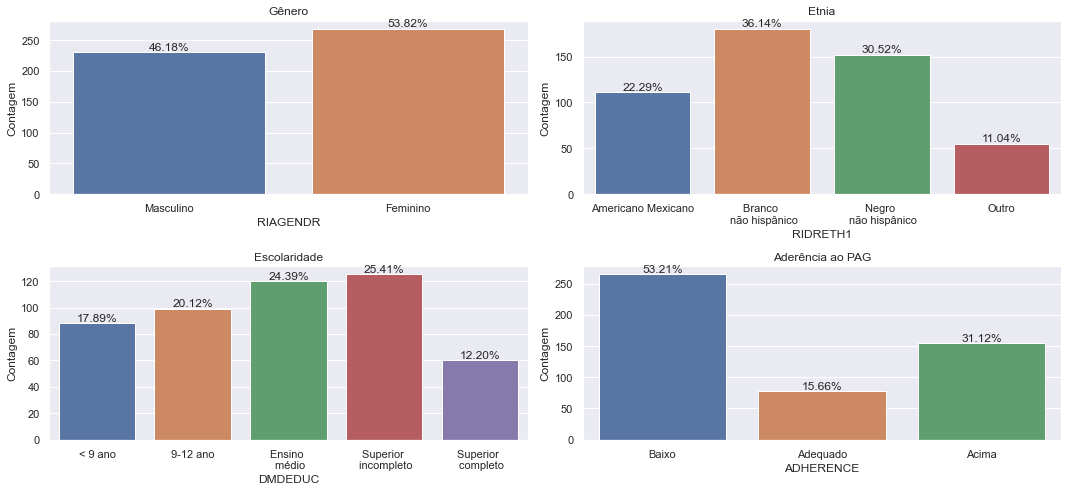

In [66]:
sns.set(font_scale=1)
fig, eixo = plt.subplots(2,2,figsize=(15,7)) 

for row in range(null_quali.shape[0]):
    for column in range(null_quali.shape[1]):
        if null_quali[row][column]!='':
            sns.countplot(ax=eixo[row][column], x=PHQ_null.replace(legenda_quali)[null_quali[row][column]],order = ordem_quali[null_quali[row][column]])
            eixo[row][column].set_ylabel('Contagem')
            eixo[row][column].set_title(titulo_quali[null_quali[row][column]])
        else:
            pass
        if null_quali[row][column]!='':
            ncount=PHQ_null[null_quali[row][column]].count()
            for p in eixo[row][column].patches:
                x=p.get_bbox().get_points()[:,0]
                y=p.get_bbox().get_points()[1,1]
                eixo[row][column].annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                        ha='center', va='bottom') # set the alignment of the text
        
plt.tight_layout()        
plt.show()

Nessa parcela da base de dados com respostas do questionário PHQ-9 faltantes, percebemos que existem algumas diferenças de distribuição em relação à de todos os dados coletados, como uma maior presença das etnias "Negro Não Hispânico" e "Outros", uma maior presença de indivíduos com escolaridade inferior à 9o ano, assim como de indivíduos com baixa aderência ao PAG.

Repetiremos a análise para os dados com informações do HEI faltantes.

In [67]:
HEI_null = df[df['HEI2015_TOTAL_SCORE'].isna()][['PHQ_GRP','RIAGENDR','RIDAGEYR','RIDRETH1','DMDEDUC',
                                                 'INDFMINC','PAG_HRW_trunc','ADHERENCE']]

In [68]:
print(f"{((df['HEI2015_TOTAL_SCORE'].isna().mean())*100).round(2)}% dos dados de HEI são Null")

5.14% dos dados de HEI são Null


In [69]:
null_quali = ['PHQ_GRP','RIAGENDR','RIDRETH1', 'DMDEDUC','ADHERENCE','']
null_quant = ['RIDAGEYR','INDFMINC','PAG_HRW_trunc','']

null_quali = np.array(null_quali).reshape(2,3)
null_quant = np.array(null_quant).reshape(2,2)

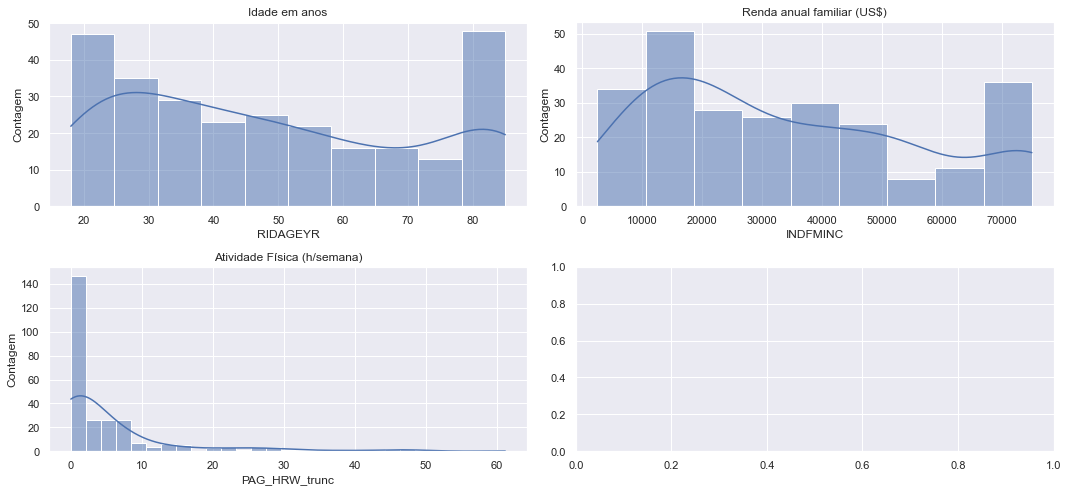

In [70]:
fig, eixo = plt.subplots(2,2,figsize=(15,7)) 


for row in range(null_quant.shape[0]):
    for column in range(null_quant.shape[1]):

        if null_quant[row][column]!='':
            sns.histplot(HEI_null, ax=eixo[row][column], x=null_quant[row][column], kde=True)
            eixo[row][column].set_ylabel('Contagem')
            eixo[row][column].set_title(titulo_quant[null_quant[row][column]])
        else: pass

plt.tight_layout()
plt.show()

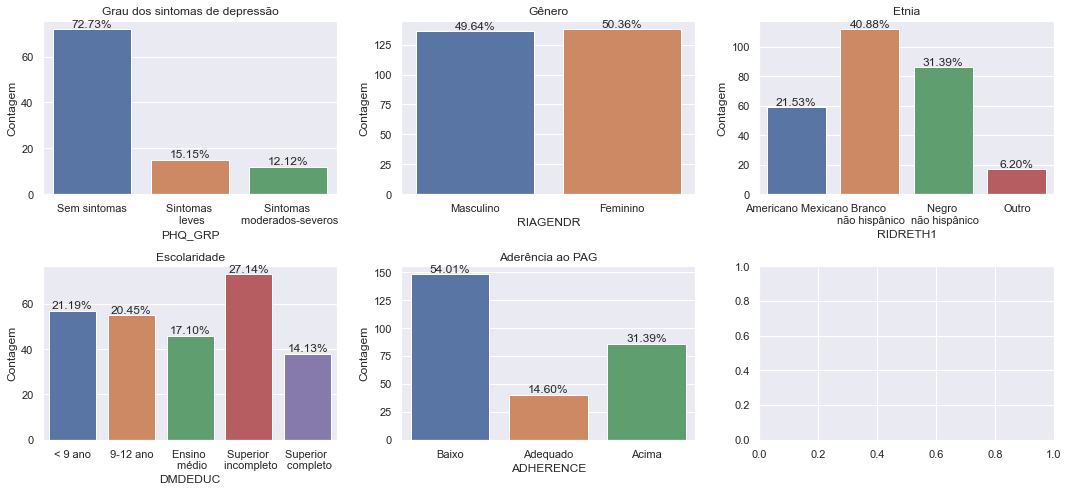

In [71]:
sns.set(font_scale=1)
fig, eixo = plt.subplots(2,3,figsize=(15,7)) 

for row in range(null_quali.shape[0]):
    for column in range(null_quali.shape[1]):
        if null_quali[row][column]!='':
            sns.countplot(ax=eixo[row][column], x=HEI_null.replace(legenda_quali)[null_quali[row][column]],order = ordem_quali[null_quali[row][column]])
            eixo[row][column].set_ylabel('Contagem')
            eixo[row][column].set_title(titulo_quali[null_quali[row][column]])
        else:
            pass
        if null_quali[row][column]!='':
            ncount=HEI_null[null_quali[row][column]].count()
            for p in eixo[row][column].patches:
                x=p.get_bbox().get_points()[:,0]
                y=p.get_bbox().get_points()[1,1]
                eixo[row][column].annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                        ha='center', va='bottom') # set the alignment of the text
        
plt.tight_layout()        
plt.show()

Na parcela da base de dados com respostas do questionário HEI faltantes, novamente percebemos uma maior presença da etnia "Negro Não Hispânico", de indivíduos com escolaridade inferior à 9o ano, assim como com baixa aderência ao PAG. Observamos também que existe uma maior concentração de indivíduos com sintomas de depressão que na distribuição de toda a amostra disponível. 

Essas informações nos mostram que dentre os dados faltantes - de cerca de 9% para PHQ-9 e 5% para o HEI -, existe uma concentração maior de certas categorias, apesar de não ser uma tendência exclusiva, existindo também uma parcela relevante de dados faltantes das demais. 

Assim, remover os dados completamente da análise pode resultar num viés, por ter maior concentração de certos grupos socio-econômicos e também de casos com depressão, sendo assim, para a análise a seguir, manteremos os dados disponíveis sempre que possível, removendo-os apenas quando estristamente necessário.

## 6. EDA: Análise Bivariada e Testes de hipóteses<a name="EDABivariada"></a>

Por fim, faremos uma análise bivariada dos dados aliada a testes de hipóteses para identificar possíveis associações estatisticamente significativas entre:
- Dados demográficos e os grupos com diferentes severidades de sintomas de depressão
- Dados demográficos e os hábitos saudáveis de alimenta;áo e atividade física
- Hábitos saudáveis e sintomas de depressão

Uma vez que diversos gráficos serão repetidamente plotados, definiremos uma função para auxiliar nestre processo.

In [72]:
# Função para construir boxplot

def grafico_boxplot(data, x, y, label, titulo_eixo_y, ordem, titulo_grafico):
    
    # data = dataframe a ser utilizado
    # x = dado categórico
    # y = dado numérico
    # label = legenda dos dados
    # titulo_eixo_y = texto com o nome do eixo y ou dicionário que contenha o nome
    # titulo_grafico = texto com o titulo do gráfico
    
    if titulo_eixo_y == "": 
        titulo_eixo_y = y
    elif type(titulo_eixo_y)==str:
        pass
    else: 
        titulo_eixo_y = titulo_eixo_y[y]

    if ordem =="": 
        sns.boxplot(x=x, y=y, data=data.replace(label))
    else:
        sns.boxplot(x=x, y=y, data=data.replace(label),order=ordem[x])
    if titulo_grafico != '':
        plt.title(titulo_grafico)
    else:
        pass
    plt.ylabel(titulo_eixo_y)
    plt.tight_layout()
    plt.show()

In [73]:
def grafico_countplot(data, x, y, legenda, ordem, titulo):
    
    # data = dataframe a ser utilizado
    # x = dado categórico A
    # y = dado categórico B
    # label = legenda dos dados
    # ordem = dicionário que contenha a ordem das categorias
    # titulo = texto com o titulo do gráfico
    
    por_categoria = pd.crosstab(index=[data.replace(legenda)[x]], columns=[data.replace(legenda)[y]])[ordem_quali[y]]
    
    for coluna in por_categoria.columns:
        por_categoria[coluna] = por_categoria[coluna]*100/por_categoria[coluna].sum()
    
    sns.set(font_scale=1.2)
    fig, eixo = plt.subplots(2,1,figsize=(20,10))
    fig.suptitle(titulo,fontsize=25)    
    
    sns.countplot(data=df.replace(legenda), order = ordem_quali[x], hue_order = ordem_quali[y],
                  x=x, hue=y, ax=eixo[0])
    eixo[0].set_title("Números absolutos",fontsize=18)
    eixo[0].set_ylabel('Contagem')
            
    for p in eixo[0].patches:
        x_=p.get_bbox().get_points()[:,0]
        y_=p.get_bbox().get_points()[1,1]
        eixo[0].annotate('{:.0f}'.format(y_), (x_.mean(), y_),
                        ha='center', va='bottom') # set the alignment of the text       
                   
    por_categoria.T.plot(kind ='bar',stacked=False,ax=eixo[1])
    eixo[1].set_title("Distribuição proporcional ao total amostral",fontsize=18)
    eixo[1].tick_params(axis='x', rotation=0)
    eixo[1].set_ylabel('Contagem')
    
    for p in eixo[1].patches:
        x_=p.get_bbox().get_points()[:,0]
        y_=p.get_bbox().get_points()[1,1]
        eixo[1].annotate('{:.1f}%'.format(y_), (x_.mean(), y_),
                        ha='center', va='bottom') # set the alignment of the text

    plt.tight_layout()
    plt.show()

### Sintomas de Depressão e Características Demográficas

#### Idade

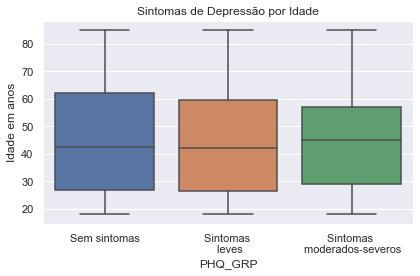

In [74]:
grafico_boxplot(df, "PHQ_GRP", "RIDAGEYR", legenda_quali, titulo_quant, ordem_quali,'Sintomas de Depressão por Idade')

Visualmente a mediana e a média de idade aparentam estar próximas, com pequenas diferenças entre os diferentes graus de sintomas de depressão.

Faremos portanto um teste para comparar a média de idade para os três grupos de sintomas de depressão. O teste F da ANOVA será utilizado, em que teremos a hipótese nula "Não existe diferença entre os grupos de depressão com relação à média de idade" e a hipótese alternativa "Existe pelo menos uma diferença na média de idade entre os grupos de sintomas de depressão".

In [75]:
# ANOVA
df_aux = df[["PHQ_GRP", "RIDAGEYR"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.PHQ_GRP == 0)]["RIDAGEYR"],
                         df_aux[(df_aux.PHQ_GRP == 1)]["RIDAGEYR"],
                         df_aux[(df_aux.PHQ_GRP == 2)]["RIDAGEYR"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente as médias são iguais, não rejeitando H0')
else: print('Provavelmente as médias são diferentes, rejeitando H0')

stat=0.536, p=0.585
Provavelmente as médias são iguais, não rejeitando H0


Assim, com um p-valor de 0.585, vemos que encontrar uma médias como as da amostra é algo bem provável de ocorrer se a hipótese nula for verdadeira, não rejeitando-a. Sendo assim, não conseguimos detectar uma diferença estatisticamente significativa entre os grupos de depressão com relação à media de idade.

#### Renda

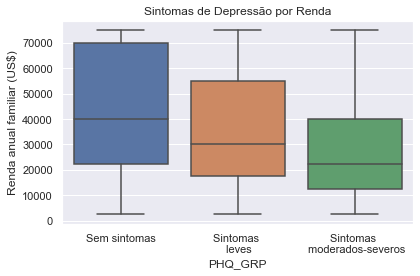

In [76]:
grafico_boxplot(df, "PHQ_GRP", "INDFMINC", legenda_quali, titulo_quant,ordem_quali,'Sintomas de Depressão por Renda')

Neste caso o gráfico nos mostra que claramente as médias e medianas são diferentes entre cada grupo. Testaremos a hipótese nula "Não existe diferença entre os grupos de depressão com relação à renda média" para verificar o mesmo.

In [77]:
# ANOVA
df_aux = df[["PHQ_GRP", "INDFMINC"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.PHQ_GRP == 0)]["INDFMINC"],
                         df_aux[(df_aux.PHQ_GRP == 1)]["INDFMINC"],
                         df_aux[(df_aux.PHQ_GRP == 2)]["INDFMINC"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente as médias são iguais, não rejeitando H0')
else: print('Provavelmente as médias são diferentes, rejeitando H0')

stat=53.617, p=0.000
Provavelmente as médias são diferentes, rejeitando H0


Como p < 0.05, no caso praticamente nulo, temos que a probabilidade de observarmos o que estamos observando nesta amostra é extremamente baixa se a hipótese nula fosse verdadeira. Neste caso, temos indícios de que a hipótese nula não é verdadeira, rejeitando-a.

Como o teste F apenas nos informa que existe pelo menos uma diferença entre os grupos de sintomas com relação a renda média, iremos realizar o teste de Tukey para Comparações Múltiplas para investigar quais diferenças são signiticativas:

In [78]:
# Teste de Tukey para Comparações Múltiplas
tukey = pairwise_tukeyhsd(df_aux['INDFMINC'],
                  df_aux['PHQ_GRP'],
                  alpha = 0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
     0      1  -5702.8946 0.001  -8453.3805  -2952.4087   True
     0      2 -13709.7098 0.001 -17081.3757 -10338.0439   True
     1      2  -8006.8152 0.001 -12167.9022  -3845.7283   True
--------------------------------------------------------------


Assim, é evidente que existe uma diferença entre as rendas médias dos três grupos de sintomas de depressão.

#### Gênero

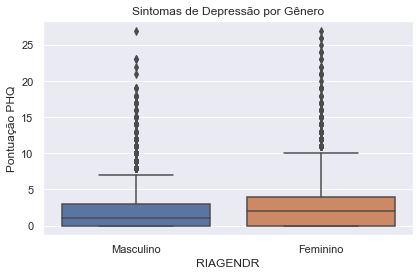

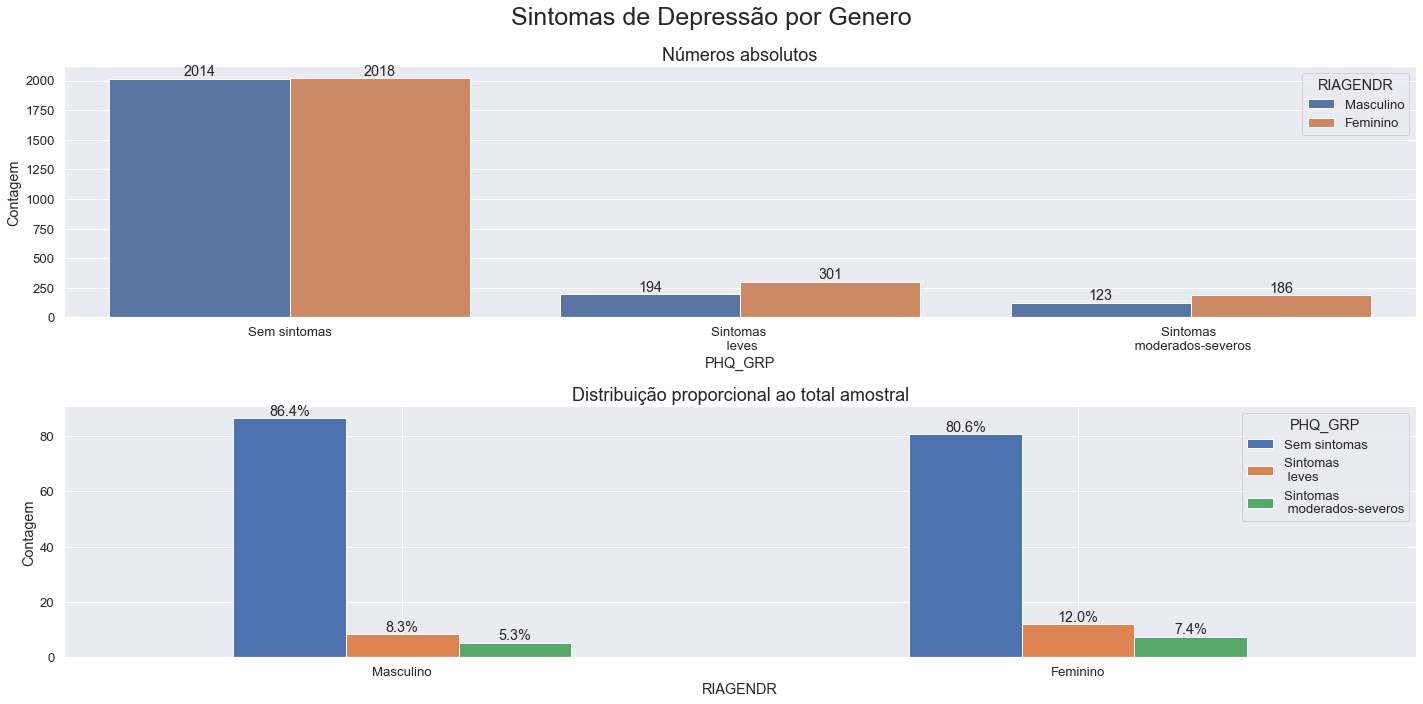

In [79]:
grafico_boxplot(df, "RIAGENDR", "PHQ9", legenda_quali, titulo_quant,ordem_quali, 'Sintomas de Depressão por Gênero')
grafico_countplot(df,'PHQ_GRP','RIAGENDR', legenda_quali, ordem_quali, 'Sintomas de Depressão por Genero')

Pelos gráficos, podemos supor que existe uma relação entre os gêneros o grupo de sintomas, por encontrarmos uma maior frequência proporcional de mulheres com sintomas mais severos do que homens.

A hipótese nula é que "as variáveis Gênero e Sintomas de Depressão não estão associadas", enquanto a hipótese alternativa é de que "as variáveis estão associadas". O teste Qui-Quadrado será aplicado para testar a independência das variáveis.

In [80]:
# Teste Qui-Quadrado
df_aux = pd.crosstab(index=[df['PHQ_GRP']], columns=[df['RIAGENDR']])

stat, p, dof, expected = stats.chi2_contingency(df_aux)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente independente, não rejeitando H0')
else: print('Provavelmente dependente, rejeitando H0')

stat=29.756, p=0.000
Provavelmente dependente, rejeitando H0


Uma vez que rejeitamos a hipótese nula, iremos realizar uma análise de correspondência, para verificar quais categorias de cada variável sãos mais correlacionadas.

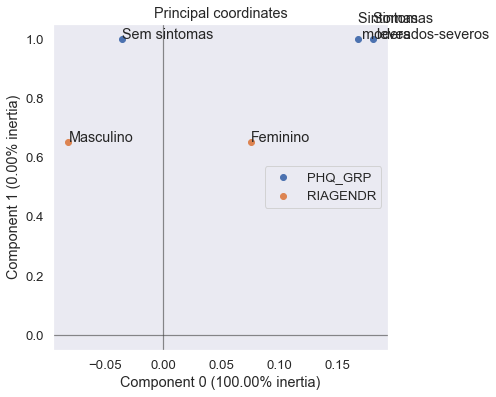

In [81]:
# Análise de Correspondência
df_correspodencia = pd.crosstab(index=[df.replace(legenda_quali)['PHQ_GRP']], columns=[df.replace(legenda_quali)['RIAGENDR']])

ca = prince.CA(
    n_components = 2,
    n_iter = 10,
    copy = True,
    check_input = True,
    engine = 'auto',
    random_state = 42)
ca = ca.fit(df_correspodencia)

ca.plot_coordinates(df_correspodencia)
plt.show()

Assim, temos que o gênero masculino está mais relacioado ao grupo sem sintomas, enquanto o gênero feminino tem mais relação com os grupos que apresentam sintomas.

#### Escolaridade

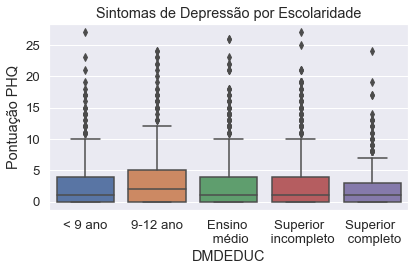

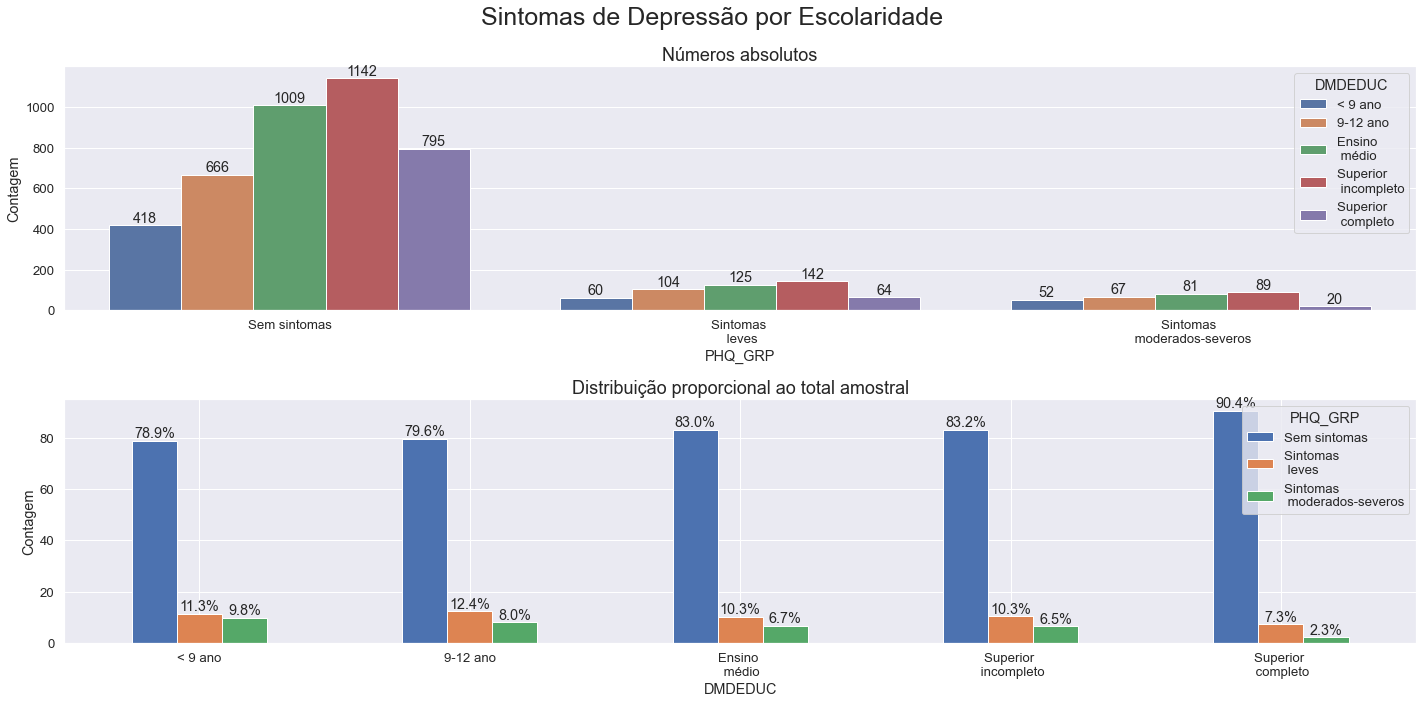

In [82]:
grafico_boxplot(df, "DMDEDUC", "PHQ9", legenda_quali, titulo_quant,ordem_quali, 'Sintomas de Depressão por Escolaridade')
grafico_countplot(df,'PHQ_GRP','DMDEDUC', legenda_quali, ordem_quali, 'Sintomas de Depressão por Escolaridade')

O teste Qui-Quadrado vai ser utilizado novamente para testar a independência das variáveis Escolaridade e Grupos de Sintomas de Depressão.

In [83]:
# Teste Qui-Quadrado
df_aux = pd.crosstab(index=[df['PHQ_GRP']], columns=[df['DMDEDUC']])

stat, p, dof, expected = stats.chi2_contingency(df_aux)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente independente, não rejeitando H0')
else: print('Provavelmente dependente, rejeitando H0')

stat=56.641, p=0.000
Provavelmente dependente, rejeitando H0


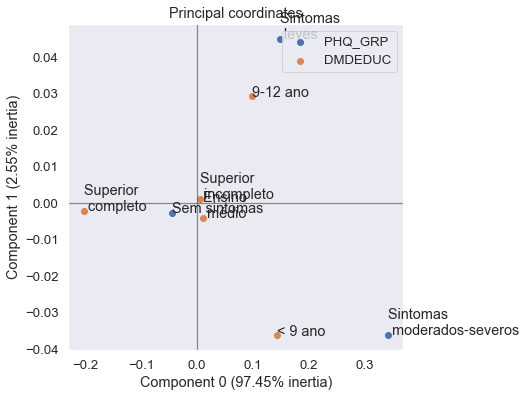

In [84]:
# Análise de Correspondência
df_correspodencia = pd.crosstab(index=[df.replace(legenda_quali)['PHQ_GRP']], columns=[df.replace(legenda_quali)['DMDEDUC']])

ca = prince.CA(
    n_components = 2,
    n_iter = 10,
    copy = True,
    check_input = True,
    engine = 'auto',
    random_state = 42)
ca = ca.fit(df_correspodencia)

ca.plot_coordinates(df_correspodencia)
plt.show()

A partir da análise temos que:
- A Escolaridade "Superior Completo" é mais correlacionada com a ausência de sintomas.
- As Escolaridades "Superior Incompleto" e "Ensino Médio" não apresentam uma correlação clara com nenhum grupo de depressão.
- As Escolaridades "9-12 ano" e "<9 ano" apresentam maior relação com a presença de sintomas, em especial "9-12 ano" com "Sintomas Leves" e "<9 ano" com "Sintomas moderados-severos".

#### Etnia

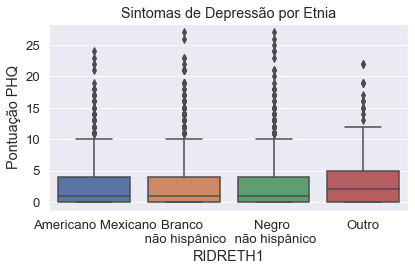

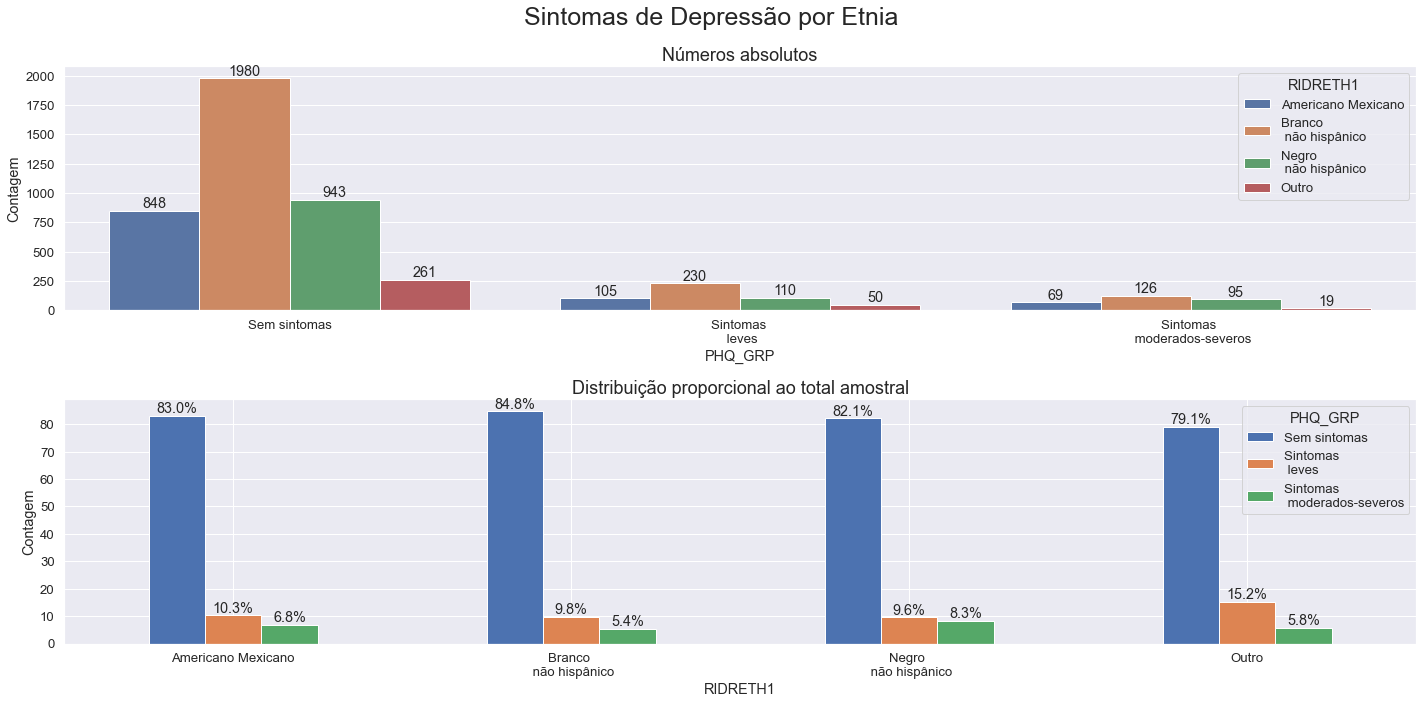

In [85]:
grafico_boxplot(df, "RIDRETH1", "PHQ9", legenda_quali, titulo_quant,ordem_quali, 'Sintomas de Depressão por Etnia')
grafico_countplot(df,'PHQ_GRP','RIDRETH1', legenda_quali, ordem_quali, 'Sintomas de Depressão por Etnia')

Novamente, o teste Qui-Quadrado será aplicado, entre Etnia e grupos de sintomas de depressão.

In [86]:
# Teste Qui-Quadrado
df_aux = pd.crosstab(index=[df['PHQ_GRP']], columns=[df['RIDRETH1']])

stat, p, dof, expected = stats.chi2_contingency(df_aux)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente independente, não rejeitando H0')
else: print('Provavelmente dependente, rejeitando H0')

stat=20.541, p=0.002
Provavelmente dependente, rejeitando H0


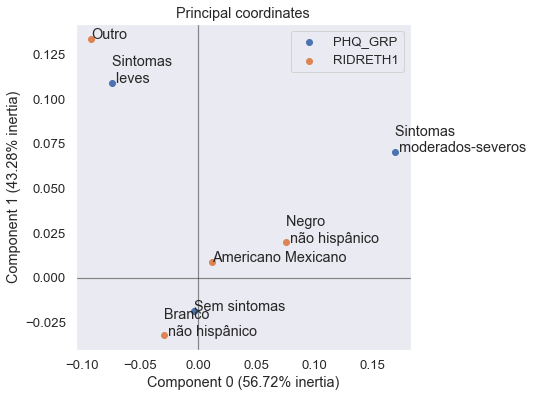

In [87]:
# Análise de Correspondência
df_correspodencia = pd.crosstab(index=[df.replace(legenda_quali)['PHQ_GRP']], columns=[df.replace(legenda_quali)['RIDRETH1']])

ca = prince.CA(
    n_components = 2,
    n_iter = 10,
    copy = True,
    check_input = True,
    engine = 'auto',
    random_state = 42)
ca = ca.fit(df_correspodencia)

ca.plot_coordinates(df_correspodencia)
plt.show()

As etnias que possuem maiores associações com os grupos são:
- 'Outro' com 'Sintomas leves'
- 'Negro não hispânico' com 'Sintomas moderados-severos'
- 'Brancos não hispânico' com 'Sem sintomas'

Assim, a partir da análise entre as características demográficas/socio-econômicas e os grupos de sintomas de depressão, observamos que:

- Quanto mais severo o sintoma de depressão, menor é a renda média do grupo.
- O gênero feminio tem maior associação com a presença de sintomas de depressão que o gênero masculino.
- A Escolaridade "Superior Completo", ou seja, o grupo com maior escolaridade, é mais correlacionada com a ausência de sintomas.
- As Escolaridades "9-12 ano" e "<9 ano", isto é, aqueles com menor escolaridade, apresentam maior relação com a presença de sintomas, em especial "9-12 ano" com "Sintomas Leves" e "<9 ano" com "Sintomas moderados-severos".
- A etnia 'Outro' tem maior relação com 'Sintomas leves'
- A etnia 'Negro não hispânico' tem maior relação com 'Sintomas moderados-severos'
- A etnia 'Brancos não hispânico' tem maior relação com 'Sem sintomas'


Faremos uma comparação entre a frequência de casos de depressão dentre o grupo socio-econômico com maior relação com os sintomas, aquele com menor relação e nossa amostra completa de dados.<br>
Criaremos uma função, para facilitar o processo, que será repetido a seguir na análise entre sintomas de depressão e hábitos saudáveis.

In [88]:
def proporcao_na_amostra(amostra, descricao_da_amostra):
    
    proporcao = amostra.value_counts(sort=False)/len(amostra)

    print('Na amostra {} temos, de um total de {} indivíduos:\n'
      '- {}% da amostra sem sintomas de depressão\n- {}% da amostra com sintomas leves de depressão\n'
      '- {}% da amostra com sintomas moderados-severos de depressão'.format(
          descricao_da_amostra,
          len(amostra), 
          (proporcao[0]*100).round(2), 
          (proporcao[1]*100).round(2), 
          (proporcao[2]*100).round(2)))

In [89]:
amostra = df['PHQ_GRP'].dropna()
proporcao_na_amostra(amostra, 'completa de dados')

Na amostra completa de dados temos, de um total de 4836 indivíduos:
- 83.37% da amostra sem sintomas de depressão
- 10.24% da amostra com sintomas leves de depressão
- 6.39% da amostra com sintomas moderados-severos de depressão


In [90]:
amostra = df[(df['RIAGENDR']==2) &
             ((df['RIDRETH1']==4) | (df['RIDRETH1']==5)) &
             ((df['DMDEDUC']==1) | (df['DMDEDUC']==2)) &
             (df['INDFMINC'] < 20000)]['PHQ_GRP'].dropna()
proporcao_na_amostra(amostra, 'do grupo socio-econômico com MAIOR associação com sintomas de depressão')

Na amostra do grupo socio-econômico com MAIOR associação com sintomas de depressão temos, de um total de 95 indivíduos:
- 67.37% da amostra sem sintomas de depressão
- 15.79% da amostra com sintomas leves de depressão
- 16.84% da amostra com sintomas moderados-severos de depressão


In [91]:
amostra = df[(df['RIAGENDR']==1) &
             (df['RIDRETH1']==3) &
             (df['DMDEDUC']==5) &
             (df['INDFMINC'] == 75000.0)]['PHQ_GRP'].dropna()
proporcao_na_amostra(amostra, 'do grupo socio-econômico com MENOR associação com sintomas de depressão')

Na amostra do grupo socio-econômico com MENOR associação com sintomas de depressão temos, de um total de 155 indivíduos:
- 98.06% da amostra sem sintomas de depressão
- 1.29% da amostra com sintomas leves de depressão
- 0.65% da amostra com sintomas moderados-severos de depressão


### Hábitos Saudáveis e Características Demográficas

Repetiremos o processo, agora avaliando a possível relação entre as características demográficas e a pontuação do HEI (Healthy Eating Index) e a quantidade de horas de atividade física por semana (ou o grupo de aderência à recomendação de exercícios físicos).

Novamente, o teste F da ANOVA e de Tukey para Comparações Múltiplas serão aplicados.

#### Gênero

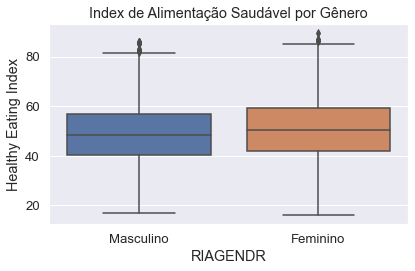

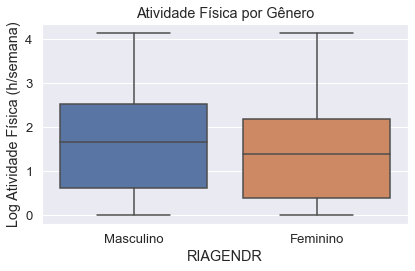

In [92]:
grafico_boxplot(df, "RIAGENDR", "HEI2015_TOTAL_SCORE", legenda_quali, titulo_quant,ordem_quali, 'Index de Alimentação Saudável por Gênero')
grafico_boxplot(df, "RIAGENDR", "PAG_HRW_log", legenda_quali, titulo_quant,ordem_quali, 'Atividade Física por Gênero')

In [93]:
# ANOVA
df_aux = df[["RIAGENDR", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.RIAGENDR == 1)]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.RIAGENDR == 2)]["HEI2015_TOTAL_SCORE"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente as médias são iguais, não rejeitando H0')
else: print('Provavelmente as médias são diferentes, rejeitando H0')

stat=27.216, p=0.000
Provavelmente as médias são diferentes, rejeitando H0


In [94]:
# ANOVA
df_aux = df[["RIAGENDR", "PAG_HRW_log"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.RIAGENDR == 1)]["PAG_HRW_log"],
                         df_aux[(df_aux.RIAGENDR == 2)]["PAG_HRW_log"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente as médias são iguais, não rejeitando H0')
else: print('Provavelmente as médias são diferentes, rejeitando H0')

stat=60.131, p=0.000
Provavelmente as médias são diferentes, rejeitando H0


A partir dos testes temos que:
- A média de pontuação do HEI é maior no gênero feminino que masculino.
- A média de tempo de atividade física semanal é maior no gênero masculino que feminino.

#### Etnia

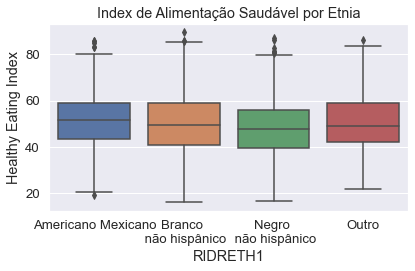

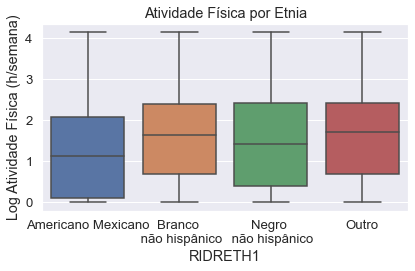

In [95]:
grafico_boxplot(df, "RIDRETH1", "HEI2015_TOTAL_SCORE", legenda_quali, titulo_quant,ordem_quali, 'Index de Alimentação Saudável por Etnia')
grafico_boxplot(df, "RIDRETH1", "PAG_HRW_log", legenda_quali, titulo_quant,ordem_quali, 'Atividade Física por Etnia')

In [96]:
# ANOVA
df_aux = df[["RIDRETH1", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.RIDRETH1 == 1)]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.RIDRETH1 == 3)]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.RIDRETH1 == 4)]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.RIDRETH1 == 5)]["HEI2015_TOTAL_SCORE"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente as médias são iguais, não rejeitando H0')
else: print('Provavelmente as médias são diferentes, rejeitando H0')

stat=11.860, p=0.000
Provavelmente as médias são diferentes, rejeitando H0


In [97]:
# Teste de Tukey para Comparações Múltiplas
tukey = pairwise_tukeyhsd(df_aux['HEI2015_TOTAL_SCORE'],
                  df_aux['RIDRETH1'],
                  alpha = 0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      3  -1.0955 0.0718 -2.2542  0.0632  False
     1      4  -2.9767  0.001 -4.2992 -1.6541   True
     1      5   -0.964  0.556 -2.8709   0.943  False
     3      4  -1.8812  0.001 -2.9928 -0.7696   True
     3      5   0.1315    0.9 -1.6357  1.8988  False
     4      5   2.0127 0.0302   0.134  3.8914   True
----------------------------------------------------


In [98]:
# ANOVA
df_aux = df[["RIDRETH1", "PAG_HRW_log"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.RIDRETH1 == 1)]["PAG_HRW_log"],
                         df_aux[(df_aux.RIDRETH1 == 3)]["PAG_HRW_log"],
                         df_aux[(df_aux.RIDRETH1 == 4)]["PAG_HRW_log"],
                         df_aux[(df_aux.RIDRETH1 == 5)]["PAG_HRW_log"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente as médias são iguais, não rejeitando H0')
else: print('Provavelmente as médias são diferentes, rejeitando H0')

stat=25.826, p=0.000
Provavelmente as médias são diferentes, rejeitando H0


In [99]:
# Teste de Tukey para Comparações Múltiplas
tukey = pairwise_tukeyhsd(df_aux['PAG_HRW_log'],
                  df_aux['RIDRETH1'],
                  alpha = 0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      3   0.3442  0.001  0.2407  0.4477   True
     1      4   0.2257  0.001  0.1081  0.3433   True
     1      5   0.3589  0.001  0.1882  0.5296   True
     3      4  -0.1185 0.0112 -0.2173 -0.0196   True
     3      5   0.0147    0.9 -0.1437   0.173  False
     4      5   0.1332 0.1744 -0.0347  0.3011  False
----------------------------------------------------


A partir dos testes temos que:
- A média de pontuação do HEI é menor para a etnia "Negro não hispânico" que o restante. 
- A média de tempo de atividade física semanal é menor na etnia "Americano mexicano" que no restante.  

#### Idade

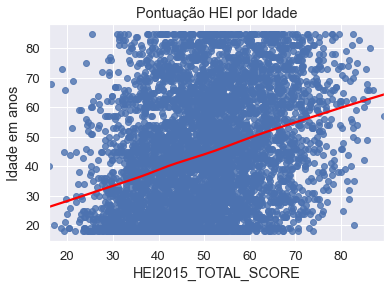

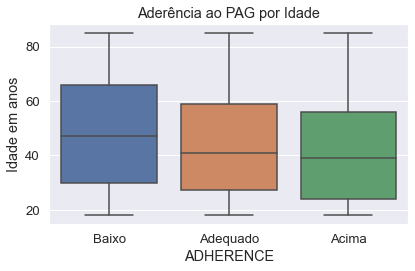

In [100]:
sns.regplot(x = 'HEI2015_TOTAL_SCORE', 
            y = 'RIDAGEYR', 
            lowess=True, 
            line_kws={'color': 'red'},
            data = df.replace(legenda_quali),)
plt.title('Pontuação HEI por Idade')
plt.ylabel(titulo_quant['RIDAGEYR'])
plt.show()

grafico_boxplot(df, "ADHERENCE", "RIDAGEYR", legenda_quali, titulo_quant, ordem_quali, 'Aderência ao PAG por Idade')

Uma vez que temos duas variáveis quantitativas, faremos um teste de correlação Pearson para avaliar a correlação entre as variáveis, que conforme plotado indica uma correlação positiva. 

In [101]:
# Teste de Correlação de Pearson
df_aux = df[["HEI2015_TOTAL_SCORE", "RIDAGEYR"]].dropna()

stat, p = stats.pearsonr(df_aux["HEI2015_TOTAL_SCORE"], df_aux["RIDAGEYR"])
print('stat=%.4f, p=%.3f' % (stat, p))
if p > 0.05: print('Provavelmente independentes')
else: print('Provavelmente dependentes')

stat=0.2998, p=0.000
Provavelmente dependentes


In [102]:
# ANOVA
df_aux = df[["ADHERENCE", "RIDAGEYR"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.ADHERENCE == 1)]["RIDAGEYR"],
                         df_aux[(df_aux.ADHERENCE == 2)]["RIDAGEYR"],
                         df_aux[(df_aux.ADHERENCE == 3)]["RIDAGEYR"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente as médias são iguais, não rejeitando H0')
else: print('Provavelmente as médias são diferentes, rejeitando H0')

stat=80.463, p=0.000
Provavelmente as médias são diferentes, rejeitando H0


In [103]:
# Teste de Tukey para Comparações Múltiplas
tukey = pairwise_tukeyhsd(df_aux['RIDAGEYR'],
                  df_aux['ADHERENCE'],
                  alpha = 0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -5.0465  0.001 -6.9273 -3.1657   True
   1.0    3.0  -7.4257  0.001 -8.8137 -6.0377   True
   2.0    3.0  -2.3792 0.0091 -4.2722 -0.4862   True
----------------------------------------------------


A partir dos testes e análises gráficas temos que:
- Existe correlação positiva entre o pontuação HEI e a idade, portanto, pessoas mais velhas tendem a se alimentar de forma mais saudável. 
- O tempo de atividade física semanal tende a se reduzir com a idade.

#### Renda

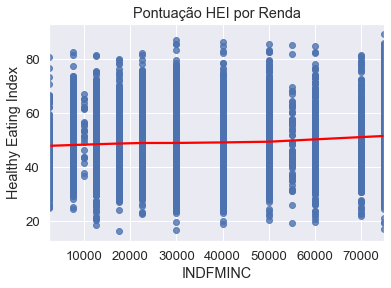

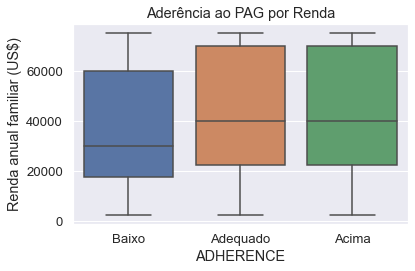

In [104]:
sns.regplot(x = 'INDFMINC', 
            y = 'HEI2015_TOTAL_SCORE', 
            lowess=True, 
            line_kws={'color': 'red'},
            data = df.replace(legenda_quali),)
plt.title('Pontuação HEI por Renda')
plt.ylabel(titulo_quant['HEI2015_TOTAL_SCORE'])
plt.show()
grafico_boxplot(df, "ADHERENCE", "INDFMINC", legenda_quali,titulo_quant,ordem_quali, 'Aderência ao PAG por Renda')

In [105]:
# Teste de Correlação de Pearson
df_aux = df[["HEI2015_TOTAL_SCORE", "INDFMINC"]].dropna()

stat, p = stats.pearsonr(df_aux["HEI2015_TOTAL_SCORE"], df_aux["INDFMINC"])
print('stat=%.4f, p=%.3f' % (stat, p))
if p > 0.05: print('Provavelmente independentes')
else: print('Provavelmente dependentes')

stat=0.0947, p=0.000
Provavelmente dependentes


In [106]:
# ANOVA
df_aux = df[["ADHERENCE", "INDFMINC"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.ADHERENCE == 1)]["INDFMINC"],
                         df_aux[(df_aux.ADHERENCE == 2)]["INDFMINC"],
                         df_aux[(df_aux.ADHERENCE == 3)]["INDFMINC"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente as médias são iguais, não rejeitando H0')
else: print('Provavelmente as médias são diferentes, rejeitando H0')

stat=44.185, p=0.000
Provavelmente as médias são diferentes, rejeitando H0


In [107]:
# Teste de Tukey para Comparações Múltiplas
tukey = pairwise_tukeyhsd(df_aux['INDFMINC'],
                  df_aux['ADHERENCE'],
                  alpha = 0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   1.0    2.0  7319.3981  0.001  5010.9401  9627.856   True
   1.0    3.0  5880.4658  0.001  4172.1224 7588.8092   True
   2.0    3.0 -1438.9323 0.3131 -3756.2233  878.3587  False
-----------------------------------------------------------


A partir dos testes e análises gráficas temos que:
- Existe uma leve correlação positiva entre o pontuação HEI e a renda, portanto, pessoas com maior renda tendem a se alimentar de forma ligeiramente mais saudável. 
- Pessoas que não se exercitam o suficiente à recomendação são em média de menor renda que as que se exercitam o suficiente ou mais que o recomendado.

#### Escolaridade

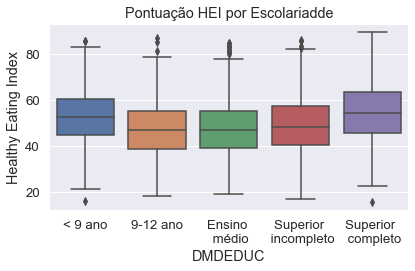

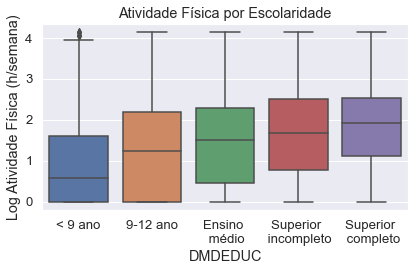

In [108]:
grafico_boxplot(df, "DMDEDUC", "HEI2015_TOTAL_SCORE", legenda_quali, titulo_quant,ordem_quali, 'Pontuação HEI por Escolariadde')
grafico_boxplot(df, "DMDEDUC", "PAG_HRW_log", legenda_quali, titulo_quant,ordem_quali, 'Atividade Física por Escolaridade')

In [109]:
# ANOVA
df_aux = df[["DMDEDUC", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.DMDEDUC == 1)]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.DMDEDUC == 2)]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.DMDEDUC == 3)]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.DMDEDUC == 4)]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.DMDEDUC == 5)]["HEI2015_TOTAL_SCORE"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente as médias são iguais, não rejeitando H0')
else: print('Provavelmente as médias são diferentes, rejeitando H0')

stat=64.987, p=0.000
Provavelmente as médias são diferentes, rejeitando H0


In [110]:
# Teste de Tukey para Comparações Múltiplas
tukey = pairwise_tukeyhsd(df_aux['HEI2015_TOTAL_SCORE'],
                  df_aux['DMDEDUC'],
                  alpha = 0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -5.3811  0.001 -7.1538 -3.6084   True
   1.0    3.0  -4.9858  0.001 -6.6458 -3.3259   True
   1.0    4.0  -3.6118  0.001 -5.2475  -1.976   True
   1.0    5.0   1.9429 0.0225  0.1779  3.7079   True
   2.0    3.0   0.3952    0.9 -1.0394  1.8299  False
   2.0    4.0   1.7693 0.0054  0.3628  3.1759   True
   2.0    5.0    7.324  0.001   5.769   8.879   True
   3.0    4.0   1.3741 0.0248  0.1126  2.6356   True
   3.0    5.0   6.9288  0.001  5.5036  8.3539   True
   4.0    5.0   5.5547  0.001  4.1578  6.9515   True
----------------------------------------------------


In [111]:
# ANOVA

df_aux = df[["DMDEDUC", "PAG_HRW_log"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.DMDEDUC == 1)]["PAG_HRW_log"],
                   df_aux[(df_aux.DMDEDUC == 2)]["PAG_HRW_log"],
                   df_aux[(df_aux.DMDEDUC == 3)]["PAG_HRW_log"],
                   df_aux[(df_aux.DMDEDUC == 4)]["PAG_HRW_log"],
                   df_aux[(df_aux.DMDEDUC == 5)]["PAG_HRW_log"])

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente as médias são iguais, não rejeitando H0')
else: print('Provavelmente as médias são diferentes, rejeitando H0')

stat=75.391, p=0.000
Provavelmente as médias são diferentes, rejeitando H0


In [112]:
# Teste de Tukey para Comparações Múltiplas
tukey = pairwise_tukeyhsd(df_aux['PAG_HRW_log'],
                  df_aux['DMDEDUC'],
                  alpha = 0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   1.0    2.0   0.4471  0.001  0.2911 0.6031   True
   1.0    3.0   0.5849  0.001  0.4384 0.7313   True
   1.0    4.0   0.7697  0.001  0.6257 0.9136   True
   1.0    5.0   0.8904  0.001  0.7345 1.0464   True
   2.0    3.0   0.1378 0.0282  0.0094 0.2661   True
   2.0    4.0   0.3226  0.001  0.1971  0.448   True
   2.0    5.0   0.4433  0.001  0.3043 0.5824   True
   3.0    4.0   0.1848  0.001  0.0715 0.2981   True
   3.0    5.0   0.3056  0.001  0.1774 0.4338   True
   4.0    5.0   0.1208 0.0652 -0.0045 0.2461  False
---------------------------------------------------


A partir dos testes e análises gráficas temos que:

- Existe uma diferença entre a pontuação média HEI dos grupos de diferentes escolaridades, onde quanto maior o grau de escolaridade, maior a pontuação HEI, exceto pelo grupo "<9o ano" que surpreende tendo a 2a maior média de HEI.
- O tempo de exercício físico por semana, no entanto, segue a ordem de escolaridade, sendo maior quanto maior o grau de escolaridade.

Portanto, temos:

- Pontuação HEI:
    - É maior no gênero feminino que masculino.
    - É menor para a etnia "Negro não hispânico" que o restante. 
    - Possui correlação positiva com a idade, portanto, pessoas mais velhas tendem a se alimentar de forma mais saudável. 
    - Possui correlação positiva com a renda, portanto, pessoas com maior renda tendem a se alimentar de forma mais saudável. 
    - Quanto maior o grau de escolaridade, maior a pontuação HEI, exceto pelo grupo "<9o ano" que surpreende tendo a 2a maior média de HEI.

- O tempo de atividade física semanal:
    - É maior no gênero masculino que feminino.
    - É menor na etnia "Americano mexicano" que no restante.  
    - Tende a se reduzir com a idade.
    - Pessoas que não se exercitam o suficiente são em média de menor renda que as que se exercitam o suficiente ou mais que o recomendado pelo PAG.
    - O tempo de exercício físico por semana é maior quanto maior o grau de escolaridade.

### Sintomas de Depressão e Hábitos Saudáveis

Finalmente, faremos também uma análise entre os grupos de sintomas de depressão e os hábitos saudáveis.

#### Atividade Física

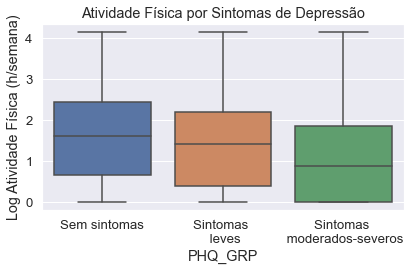

In [113]:
grafico_boxplot(df, 'PHQ_GRP',"PAG_HRW_log", legenda_quali, titulo_quant,ordem_quali, 'Atividade Física por Sintomas de Depressão')

In [114]:
# ANOVA
df_aux = df[["PHQ_GRP", "PAG_HRW_log"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.PHQ_GRP == 0)]["PAG_HRW_log"],
                         df_aux[(df_aux.PHQ_GRP == 1)]["PAG_HRW_log"],
                         df_aux[(df_aux.PHQ_GRP == 2)]["PAG_HRW_log"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente as médias são iguais, não rejeitando H0')
else: print('Provavelmente as médias são diferentes, rejeitando H0')

stat=35.026, p=0.000
Provavelmente as médias são diferentes, rejeitando H0


In [115]:
# Teste de Tukey para Comparações Múltiplas
tukey = pairwise_tukeyhsd(df_aux['PAG_HRW_log'],
                  df_aux['PHQ_GRP'],
                  alpha = 0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.1577 0.0087 -0.2827 -0.0328   True
     0      2  -0.5325  0.001 -0.6873 -0.3776   True
     1      2  -0.3747  0.001  -0.565 -0.1845   True
----------------------------------------------------


Existe uma clara associação entre os grupos de sintomas de depressão e o tempo de atividade física semanal, onde aqueles com maiores sintomas de depressão são também aqueles que fazem menos exercícios físicos.

#### Healthy Eating Index (HEI)

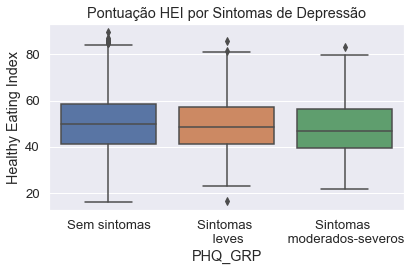

In [116]:
grafico_boxplot(df, 'PHQ_GRP',"HEI2015_TOTAL_SCORE", legenda_quali, titulo_quant,ordem_quali, 'Pontuação HEI por Sintomas de Depressão')

In [117]:
# ANOVA
df_aux = df[["PHQ_GRP", "HEI2015_TOTAL_SCORE"]].dropna()

stat, p = stats.f_oneway(df_aux[(df_aux.PHQ_GRP == 0)]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.PHQ_GRP == 1)]["HEI2015_TOTAL_SCORE"],
                         df_aux[(df_aux.PHQ_GRP == 2)]["HEI2015_TOTAL_SCORE"])
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05: print('Provavelmente as médias são iguais, não rejeitando H0')
else: print('Provavelmente as médias são diferentes, rejeitando H0')

stat=6.341, p=0.002
Provavelmente as médias são diferentes, rejeitando H0


In [118]:
# Teste de Tukey para Comparações Múltiplas
tukey = pairwise_tukeyhsd(df_aux['HEI2015_TOTAL_SCORE'],
                  df_aux['PHQ_GRP'],
                  alpha = 0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.979  0.228  -2.376   0.418  False
     0      2  -2.4406 0.0029 -4.1796 -0.7016   True
     1      2  -1.4616 0.2435 -3.5955  0.6724  False
----------------------------------------------------


Em relação à alimentação, vemos que a pontuação HEI média é inferior e estatísticamente significativa para o grupo com sintomas de depressão moderados a severos. 

Para o grupo com sintomas leves, a média é menor que a do grupo sem sintomas, porém não é uma diferença estatíticamente significativa, portanto não podemos afirmar que estes também possuem pontuação menor em geral.

Vamos também avaliar as possíveis relações entre cada tipo categoria específica dos hábitos alimentares com os sintomas de depressão, plotando o gráfico dos casos em que as categorias não são independentes.

Total de Vegetais - HEI2015C1_TOTALVEG
stat=17.595, p=0.001
Provavelmente dependente, rejeitando H0



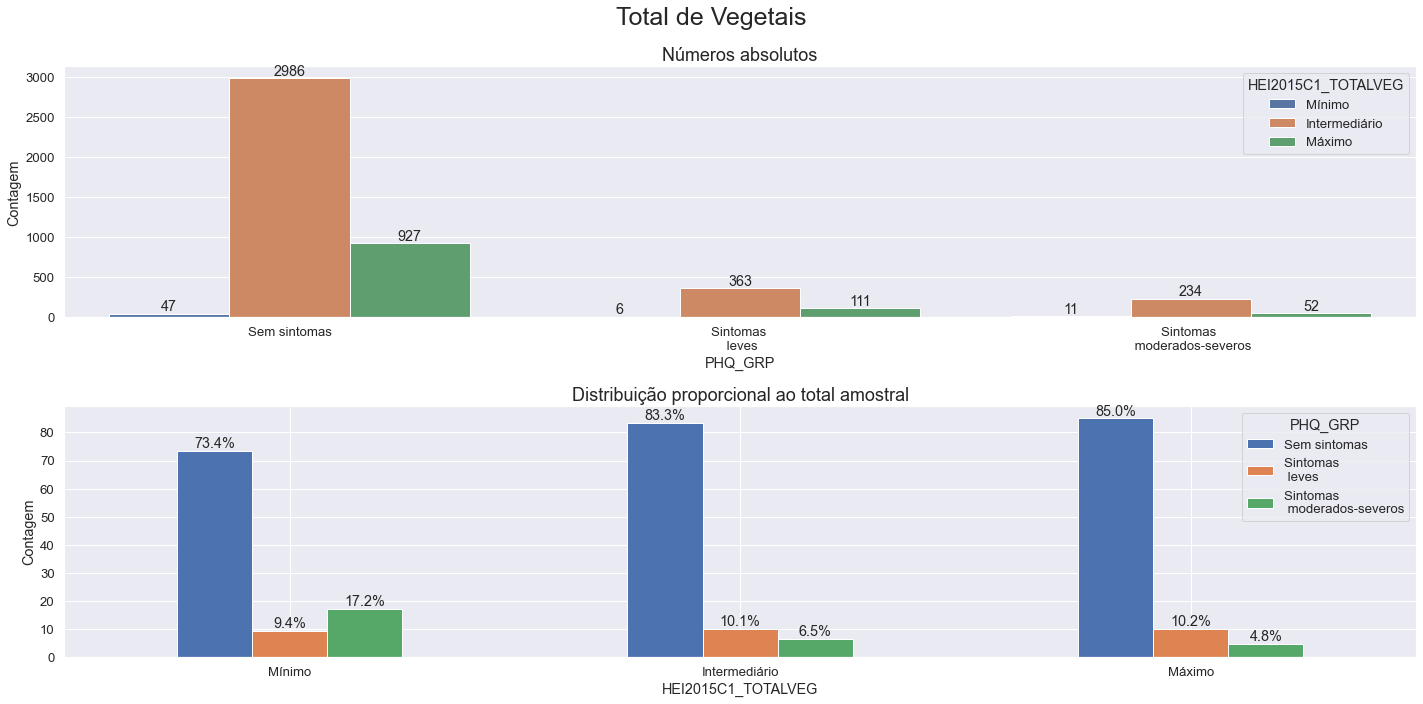

------------------------------------------------------------
Verduras verdeescuras e leguminosas - HEI2015C2_GREEN_AND_BEAN
stat=6.574, p=0.160
Provavelmente independente, não rejeitando H0

------------------------------------------------------------
Frutas totais - HEI2015C3_TOTALFRUIT
stat=21.224, p=0.000
Provavelmente dependente, rejeitando H0



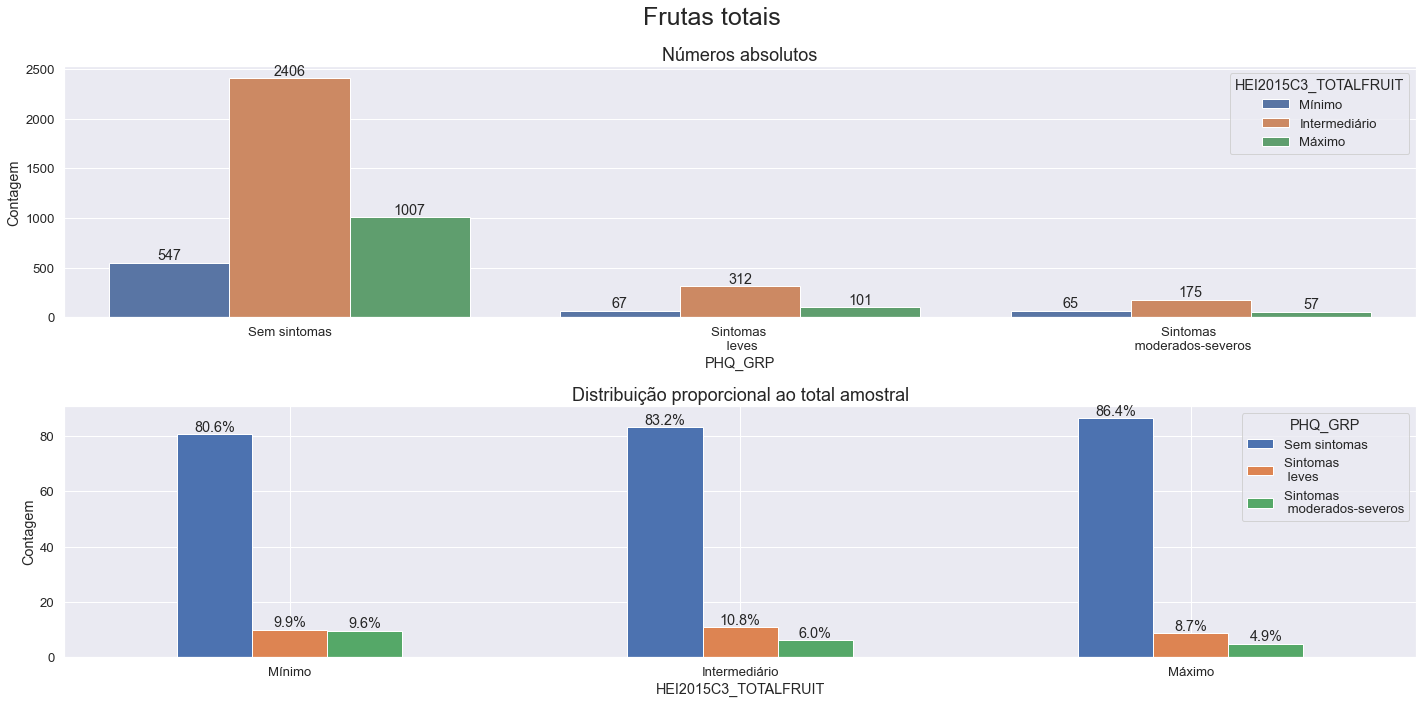

------------------------------------------------------------
Frutas in natura - HEI2015C4_WHOLEFRUIT
stat=11.201, p=0.024
Provavelmente dependente, rejeitando H0



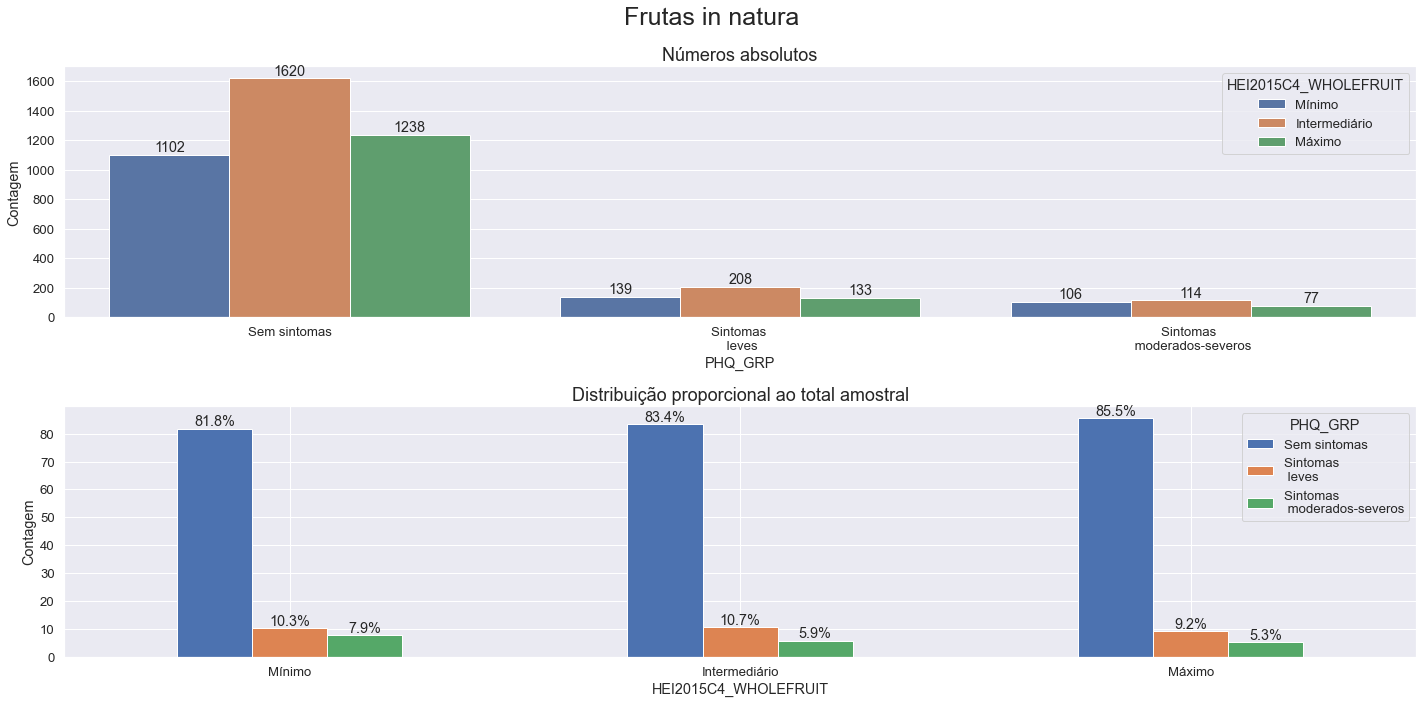

------------------------------------------------------------
Grãos integrais - HEI2015C5_WHOLEGRAIN
stat=23.505, p=0.000
Provavelmente dependente, rejeitando H0



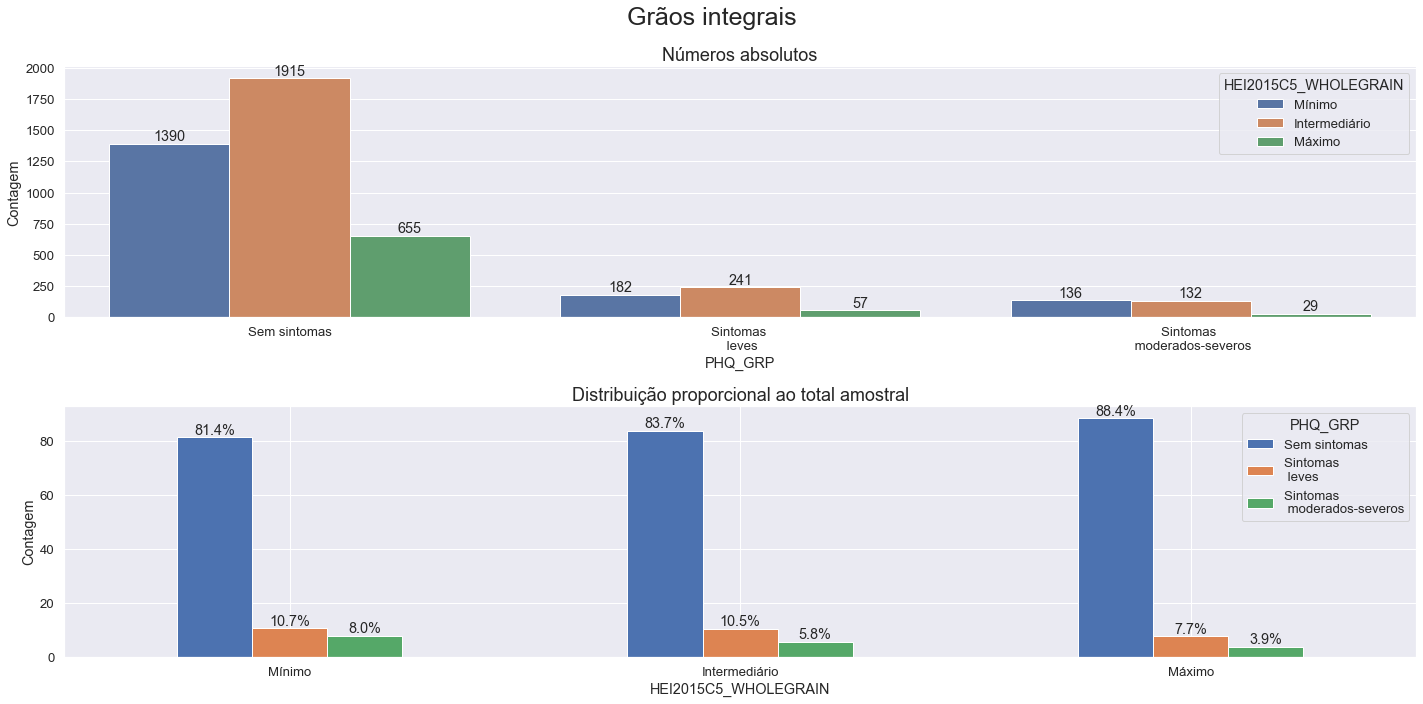

------------------------------------------------------------
Laticínios - HEI2015C6_TOTALDAIRY
stat=3.406, p=0.492
Provavelmente independente, não rejeitando H0

------------------------------------------------------------
Proteínas - HEI2015C7_TOTPROT
stat=5.200, p=0.267
Provavelmente independente, não rejeitando H0

------------------------------------------------------------
Plantas marinhas e proteínas vegetais - HEI2015C8_SEAPLANT_PROT
stat=13.239, p=0.010
Provavelmente dependente, rejeitando H0



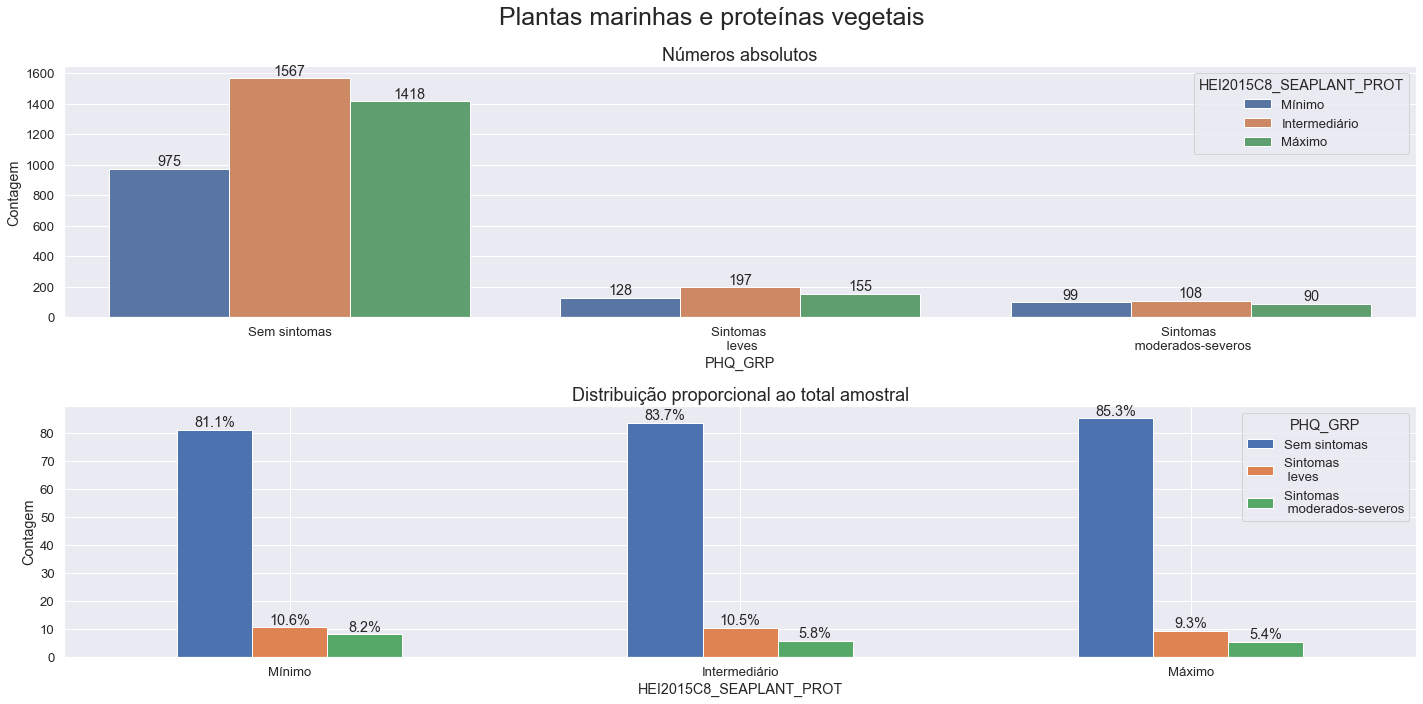

------------------------------------------------------------
Ácido-graxo - HEI2015C9_FATTYACID
stat=12.172, p=0.016
Provavelmente dependente, rejeitando H0



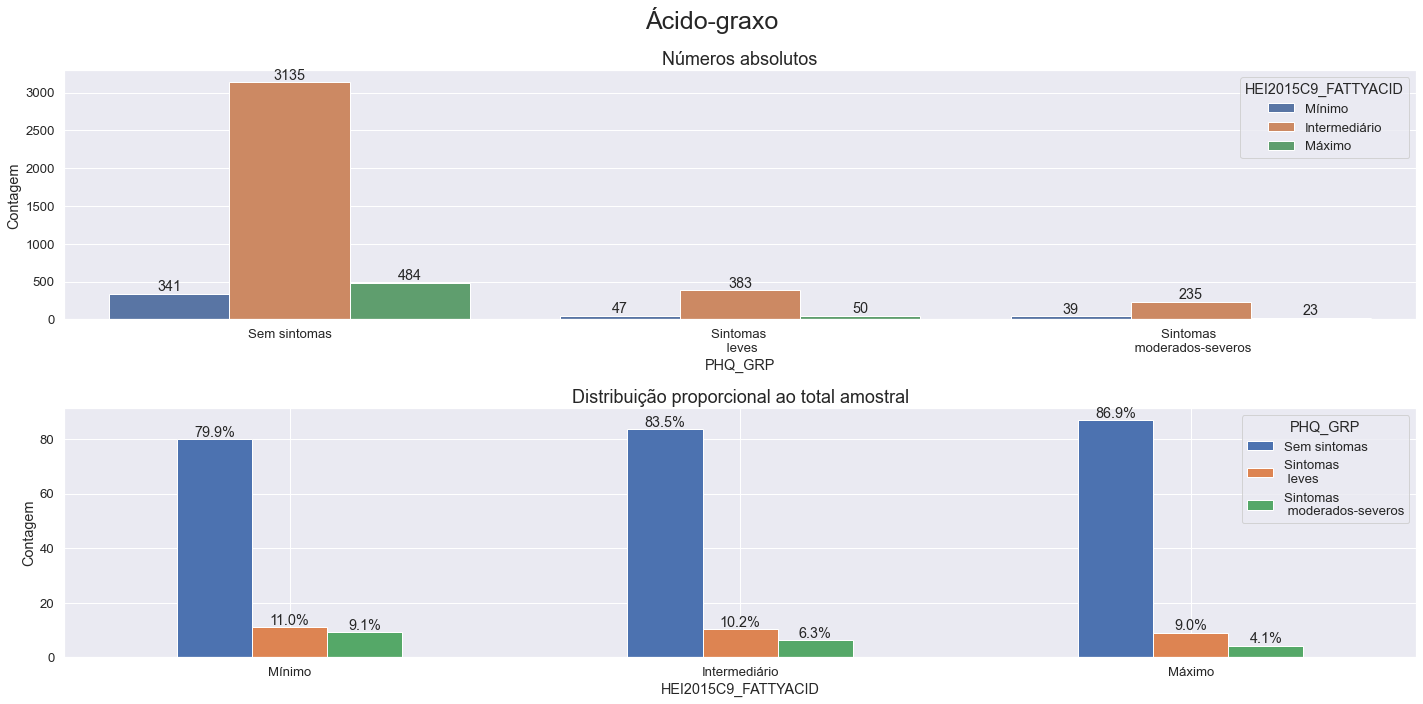

------------------------------------------------------------
Sódio - HEI2015C10_SODIUM
stat=7.738, p=0.102
Provavelmente independente, não rejeitando H0

------------------------------------------------------------
Grãos refinados - HEI2015C11_REFINEDGRAIN
stat=5.603, p=0.231
Provavelmente independente, não rejeitando H0

------------------------------------------------------------
Gordura saturada - HEI2015C12_SFAT
stat=3.221, p=0.522
Provavelmente independente, não rejeitando H0

------------------------------------------------------------
Açúcares adicionados - HEI2015C13_ADDSUG
stat=21.087, p=0.000
Provavelmente dependente, rejeitando H0



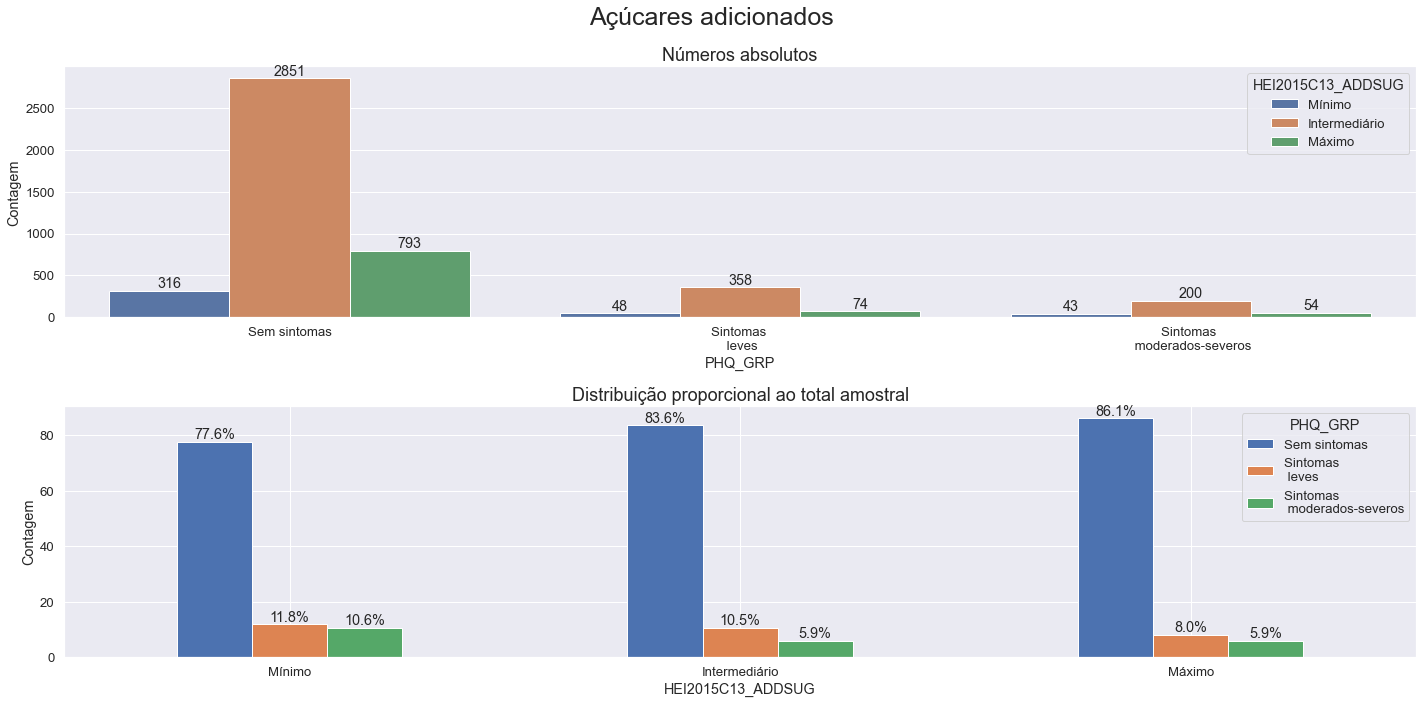

------------------------------------------------------------


In [119]:
lista_HEI_depressao = []

for categoria in lista_HEI:
    df_aux = pd.crosstab(index=[df['PHQ_GRP']], columns=[df[categoria]])
    
    stat, p, dof, expected = stats.chi2_contingency(df_aux)
    
    print('{} - {}'.format(titulo_quant[categoria].replace(' \n', ''), categoria))
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('Provavelmente independente, não rejeitando H0\n') 
        lista_HEI_depressao.append(categoria)
        print('------------------------------------------------------------')
    else: 
        print('Provavelmente dependente, rejeitando H0\n')
        grafico_countplot(df, 'PHQ_GRP',categoria, legenda_quali, ordem_quali,titulo_quant[categoria].replace(' \n', ''))
        print('------------------------------------------------------------')

Para diversas categorias de alimentação podemos observar que existe uma correlação específica entre hábitos alimentares desta categoria e o grupo de sintomas de depressão, em que há uma clara tendência de maior proporção de indivíduos com sintomas de depressão para alimentações com pontuações mínimas em relação à pontuação máxima.

Novamente, faremos uma comparação entre os grupos com hábitos que possuem maior associação com a depressão e aqueles com menor associação.

In [120]:
amostra = df[(df['PAG_HRW_log']<0.6) &
             (df['HEI2015_TOTAL_SCORE']<36)]['PHQ_GRP'].dropna()
proporcao_na_amostra(amostra, 'do grupo com hábitos saudáveis com MAIOR associação com sintomas de depressão')

Na amostra do grupo com hábitos saudáveis com MAIOR associação com sintomas de depressão temos, de um total de 170 indivíduos:
- 78.82% da amostra sem sintomas de depressão
- 10.59% da amostra com sintomas leves de depressão
- 10.59% da amostra com sintomas moderados-severos de depressão


In [121]:
amostra = df[(df['PAG_HRW_log']>2.5) &
             (df['HEI2015_TOTAL_SCORE']>60)]['PHQ_GRP'].dropna()
proporcao_na_amostra(amostra, 'do grupo com hábitos saudáveis com MENOR associação com sintomas de depressão')

Na amostra do grupo com hábitos saudáveis com MENOR associação com sintomas de depressão temos, de um total de 246 indivíduos:
- 95.12% da amostra sem sintomas de depressão
- 3.25% da amostra com sintomas leves de depressão
- 1.63% da amostra com sintomas moderados-severos de depressão


#### Análise final

Por fim, faremos uma rápida análise da frequência de indivíduos com sintomas de depressão na população com perfil socio-econômico mais associada à depressão, ao separarmos por hábitos alimentares e de atividade física.

In [122]:
print('Temos na amostra um total de {} individuos nas condições socioeconômicas fortemente associadas à sintomas de depressão,'
      ' com \nvalores não Null para os hábitos saudáveis e sintomas de depressão.'.format((df[(df['RIAGENDR']==2) &
             ((df['RIDRETH1']==4) | (df['RIDRETH1']==5)) &
             ((df['DMDEDUC']==1) | (df['DMDEDUC']==2)) &
             (df['INDFMINC'] < 20000)].dropna(subset=['PHQ_GRP', 'HEI2015_TOTAL_SCORE', 'PAG_HRW_log'])).shape[0]))

Temos na amostra um total de 92 individuos nas condições socioeconômicas fortemente associadas à sintomas de depressão, com 
valores não Null para os hábitos saudáveis e sintomas de depressão.


In [123]:
amostra = df[(df['RIAGENDR']==2) &
             ((df['RIDRETH1']==4) | (df['RIDRETH1']==5)) &
             ((df['DMDEDUC']==1) | (df['DMDEDUC']==2)) &
             (df['INDFMINC'] < 20000) & 
             (df['PAG_HRW_log']>=1) &
             (df['HEI2015_TOTAL_SCORE']>=50)]['PHQ_GRP'].dropna()
proporcao_na_amostra(amostra, 'do grupo socio-econômico com MAIOR associação com sintomas de depressão, que tenham hábitos '
                     'saudáveis para ambos \natividade física e alimentação,')

Na amostra do grupo socio-econômico com MAIOR associação com sintomas de depressão, que tenham hábitos saudáveis para ambos 
atividade física e alimentação, temos, de um total de 16 indivíduos:
- 93.75% da amostra sem sintomas de depressão
- 0.0% da amostra com sintomas leves de depressão
- 6.25% da amostra com sintomas moderados-severos de depressão


In [124]:
amostra = df[(df['RIAGENDR']==2) &
             ((df['RIDRETH1']==4) | (df['RIDRETH1']==5)) &
             ((df['DMDEDUC']==1) | (df['DMDEDUC']==2)) &
             (df['INDFMINC'] < 20000) & 
             (((df['PAG_HRW_log']>=1) & (df['HEI2015_TOTAL_SCORE']<50)) |
             ((df['PAG_HRW_log']<1) & (df['HEI2015_TOTAL_SCORE']>=50)))]['PHQ_GRP'].dropna()
proporcao_na_amostra(amostra, 'do grupo socio-econômico com MAIOR associação com sintomas de depressão, que tenham hábitos'
                     ' saudáveis para \natividade física ou alimentação, mas não ambos,')

Na amostra do grupo socio-econômico com MAIOR associação com sintomas de depressão, que tenham hábitos saudáveis para 
atividade física ou alimentação, mas não ambos, temos, de um total de 42 indivíduos:
- 66.67% da amostra sem sintomas de depressão
- 16.67% da amostra com sintomas leves de depressão
- 16.67% da amostra com sintomas moderados-severos de depressão


In [125]:
amostra = df[(df['RIAGENDR']==2) &
             ((df['RIDRETH1']==4) | (df['RIDRETH1']==5)) &
             ((df['DMDEDUC']==1) | (df['DMDEDUC']==2)) &
             (df['INDFMINC'] < 20000) & 
             (df['PAG_HRW_log']<1) &
             (df['HEI2015_TOTAL_SCORE']<50)]['PHQ_GRP'].dropna()
proporcao_na_amostra(amostra, 'do grupo socio-econômico com MAIOR associação com sintomas de depressão, que não tenham hábitos'
                     ' saudáveis para \natividade física nem para alimentação,')

Na amostra do grupo socio-econômico com MAIOR associação com sintomas de depressão, que não tenham hábitos saudáveis para 
atividade física nem para alimentação, temos, de um total de 34 indivíduos:
- 55.88% da amostra sem sintomas de depressão
- 23.53% da amostra com sintomas leves de depressão
- 20.59% da amostra com sintomas moderados-severos de depressão


## 7.  Conclusões <a name="conclusao"></a>

Ao fim da análise temos que existem correlações entre os hábitos saudáveis de alimentação e de atividade física e os sintomas de depressão, em que pessoas com sintomas de depressão tendem a ser as que também tem piores hábitos saudáveis.<br>

Além disso, também observamos uma correlação entre características socio-econômicas com a depressão, como o gênero feminino, as etnias "Negro não hispânico" e "Outro", a baixa escolaridade e a baixa renda, sendo o perfil em que mais seriam encontrados casos de depressão.

No entanto, uma vez que o estudo empregado foi observacional, não podemos afimar que os hábitos saudáveis possuem um efeito causal na prevenção da depressão apenas que existe uma correlaçao entre ambos. <br>
A associação existente pode ter, por exemplo, causalidade inversa, onde a depressão pode ser a causa de uma procura por alimentos menos saudáveis (com mais gordura ou açúcar, por exemplo) ou pela baixa frequência de atividade física, devido à indisposição (sintoma clássico da depressão).

É importante ressaltar que, apesar de não ser necessáriamente uma causalidade, a diferença que pudemos observar ao se comparar os grupos mais e menos associados com a depressão é enorme, de modo que é evidente a associação, tanto socio-econômica quanto de hábitos saudáveis com a depressão.

## 8.  Referências <a name="referencias"></a>

- National Health and Nutrition Examination Survey (NHANES)<a name="1"></a>: https://www.cdc.gov/nchs/nhanes/index.htm
- Dicionário das variáveis<a name="2"></a>: https://github.com/danieljullien/Habitos-Saudaveis-e-Sintomas-de-Depressao/tree/main/Dicionário